In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Cleaning

1. Load the dataset
2. Make a copy of the dataset
3. Remove personal data (marked with NaN)
4. Adjust column names (from Unnamed to Other + descriptive title for the column)

In [74]:
df = pd.read_csv("data/muslim_brand_apr_2025.csv")
df = df.drop(index=0).reset_index(drop=True)

In [75]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Would you feel comfortable buying goods or services from a Muslim-owned business?,"If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?","How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?",Gender,Age,Major US Region,Device,Household Income
0,1.188546e+11,460661826.0,04/30/2025 12:53:35 AM,04/30/2025 12:55:17 AM,NaN,NaN,NaN,NaN,ef40bd87bd3358ba2c386b2b70,smc,...,Not often,No,Yes,No,A little,male,60_above,south_atlantic,pc_mac,200000_and_up
1,1.188546e+11,460661826.0,04/30/2025 12:48:31 AM,04/30/2025 12:53:46 AM,NaN,NaN,NaN,NaN,aa5cc16192f7dd43be7f73c040,smc,...,I don't know,No,Yes,Yes,A little,female,60_above,middle_atlantic,pc_mac,50000_to_74999
2,1.188546e+11,460661826.0,04/30/2025 12:49:44 AM,04/30/2025 12:50:12 AM,NaN,NaN,NaN,NaN,a75b1d6fff06bdd392642de54c,smc,...,Often,Yes,Yes,Yes,A great deal,female,45_to_60,middle_atlantic,android_mobile,100000_to_124999
3,1.188546e+11,460661826.0,04/30/2025 12:47:40 AM,04/30/2025 12:49:50 AM,NaN,NaN,NaN,NaN,798e4f361a316f80e9dc53e96d,smc,...,Not often,No,Yes,No,None at all,female,60_above,west_north_central,ios_mobile,75000_to_99999
4,1.188546e+11,460661826.0,04/30/2025 12:47:18 AM,04/30/2025 12:49:46 AM,NaN,NaN,NaN,NaN,bc6569ce49654ea657ac0f31d3,smc,...,Not often,No,Yes,No,A little,male,45_to_60,south_atlantic,android_mobile,175000_to_199999


In [76]:
apr25= df.copy()

In [77]:
apr25 = apr25.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 
                            'IP Address', 'Email Address', 'First Name', 'Last Name', 
                            'Custom Data 1', 'collector_type_source', 'Device'])

In [78]:
apr25.rename(columns={'Unnamed: 11': "Religion_other"}, inplace= True)
apr25.rename(columns={'Unnamed: 16':"News_other"}, inplace= True)

In [79]:
apr25.columns

Index(['What is your religion?', 'Religion_other',
       'How many muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Would you feel comfortable buying goods or services from a Muslim-owned business?',
       'If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?',
       'How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?',
       'Gender', 'Age', 'Major US Region', 'Household Income'],
      dtype='object')

In [80]:
apr25.describe()

,What is your religion?,Religion_other,How many muslim people have you talked to in the last 7 days?,How do you feel about Muslim people in America?,What is your level of education?,Where do you get your news from?,News_other,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Would you feel comfortable buying goods or services from a Muslim-owned business?,"If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?","How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?",Gender,Age,Major US Region,Household Income
count,103,13,103,103,103,103,27,103,103,102,102,101,102,103,103,102,103
unique,9,13,5,3,4,9,26,4,3,3,2,2,4,2,4,8,11
top,Christian (Catholic),Espiscopal,None - 0,Good,College,Other (please specify),MSNBC,Very comfortable,Not often,No,Yes,No,A little,female,30_to_44,pacific,25000_to_49999
freq,24,1,50,50,41,27,2,49,50,51,89,53,40,60,32,26,30


# 2. Metrics

## 2.1 Sentiment Proportion

In [81]:
sentiment_prop = apr25['How do you feel about Muslim people in America?'].value_counts(normalize=True).reset_index()
sentiment_prop.columns = ['Category', 'Percentage']
sentiment_prop['Percentage'] *= 100  

In [82]:
sentiment_prop 

,Category,Percentage
0,Good,48.543689
1,Neutral,45.631068
2,Bad,5.825243


In [83]:
print( "Good sentiment percentage:", sentiment_prop.loc[0,'Percentage'])
print( "Neutral sentimen percentaget:", sentiment_prop.loc[1,'Percentage'])
print( "Bad sentiment percentage:", sentiment_prop.loc[2,'Percentage'])

Good sentiment percentage: 48.54368932038835
Neutral sentimen percentaget: 45.63106796116505
Bad sentiment percentage: 5.825242718446602


## 2.2 Positive to Negative Ratio

In [84]:
ratio = apr25['How do you feel about Muslim people in America?'].value_counts().reset_index()
positive_to_negative_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[2,'How do you feel about Muslim people in America?']

In [85]:
ratio

,index,How do you feel about Muslim people in America?
0,Good,50
1,Neutral,47
2,Bad,6


In [86]:
positive_to_negative_ratio

8.333333333333334

## Positive to Neutral Ratio

In [87]:
positive_to_neutral_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[1,'How do you feel about Muslim people in America?']

In [88]:
positive_to_neutral_ratio

1.0638297872340425

# Function 1: Plotting Distributions (%)

In [89]:
def plot_percentages(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  # Convert to percentage

    max_index = counts_df['Percentage'].idxmax()
    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]
    
    plt.figure(figsize=(8.5, 5.5), dpi=150)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette=colors)


    plt.title(title, fontsize=10)
    plt.xlabel(x_label, fontsize=8)
    plt.ylabel('Percentage', fontsize=8)

    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(rotation=45, ha='right', fontsize=7)

    plt.tight_layout()
    plt.show()


# Function 2: Plotting Sentiment Breakdown (Good, Neutral, Bad)

In [90]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.figure(figsize=(9, 5), dpi=800)
    plt.show()

# Function 3: Plotting Comfort Levels (%)

In [91]:
def plot_comfort (df, category_col, comfort_level, title, xlabel, ylabel): 
    
    grouped = df.groupby([category_col, comfort_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=comfort_level, values='percentage').fillna(0)

    comfort_colors = {
        'Very comfortable': '#17b50e',  
        'Comfortable': '#9be897',       
        'Neutral': '#e3e1e1',           
        'Uncomfortable': '#cf4229',     
        'Very uncomfortable': '#2ebf26'  
    }



    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), \
                          color=[comfort_colors.get(level) for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i, variable in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[variable, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Very comfortable' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    

    plt.show()

## Overall Sentiment and Comfort Levels Across All Participants

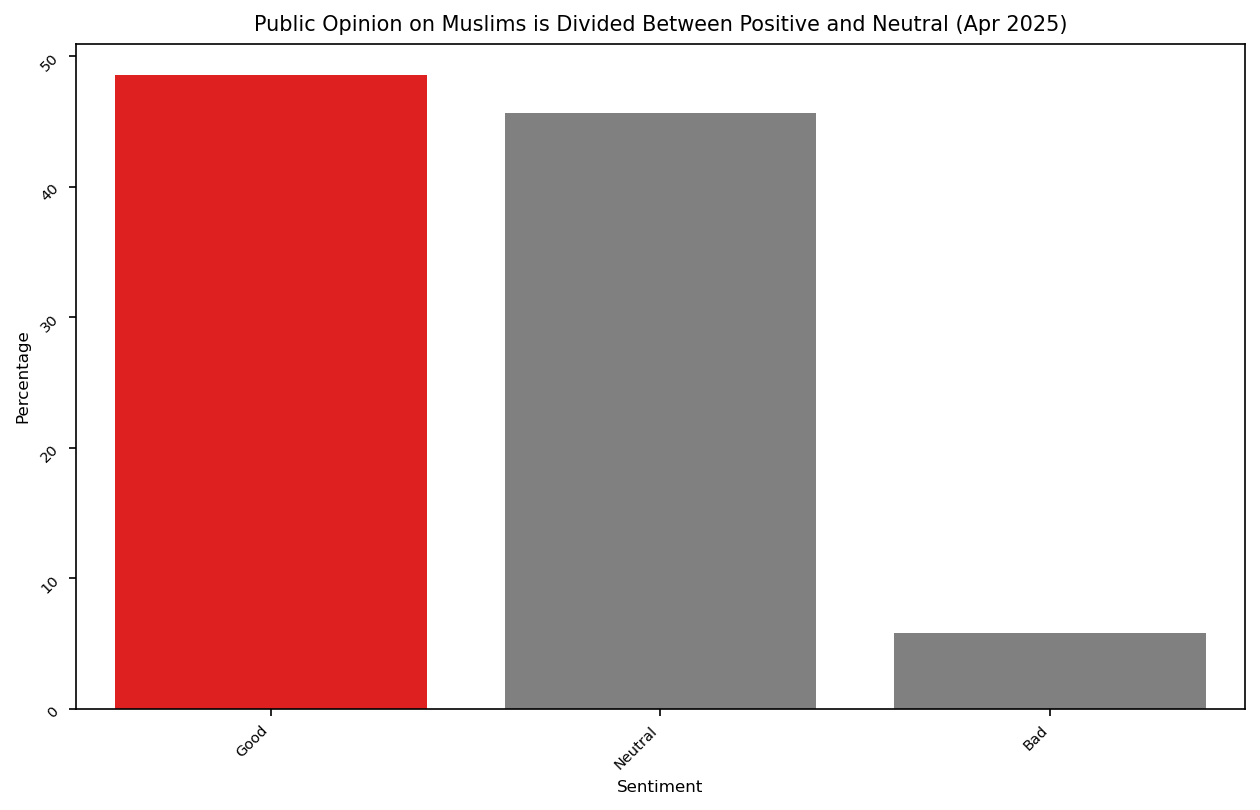

In [92]:
plot_percentages(apr25,'How do you feel about Muslim people in America?', 'Sentiment', \
                 'Public Opinion on Muslims is Divided Between Positive and Neutral (Apr 2025)')

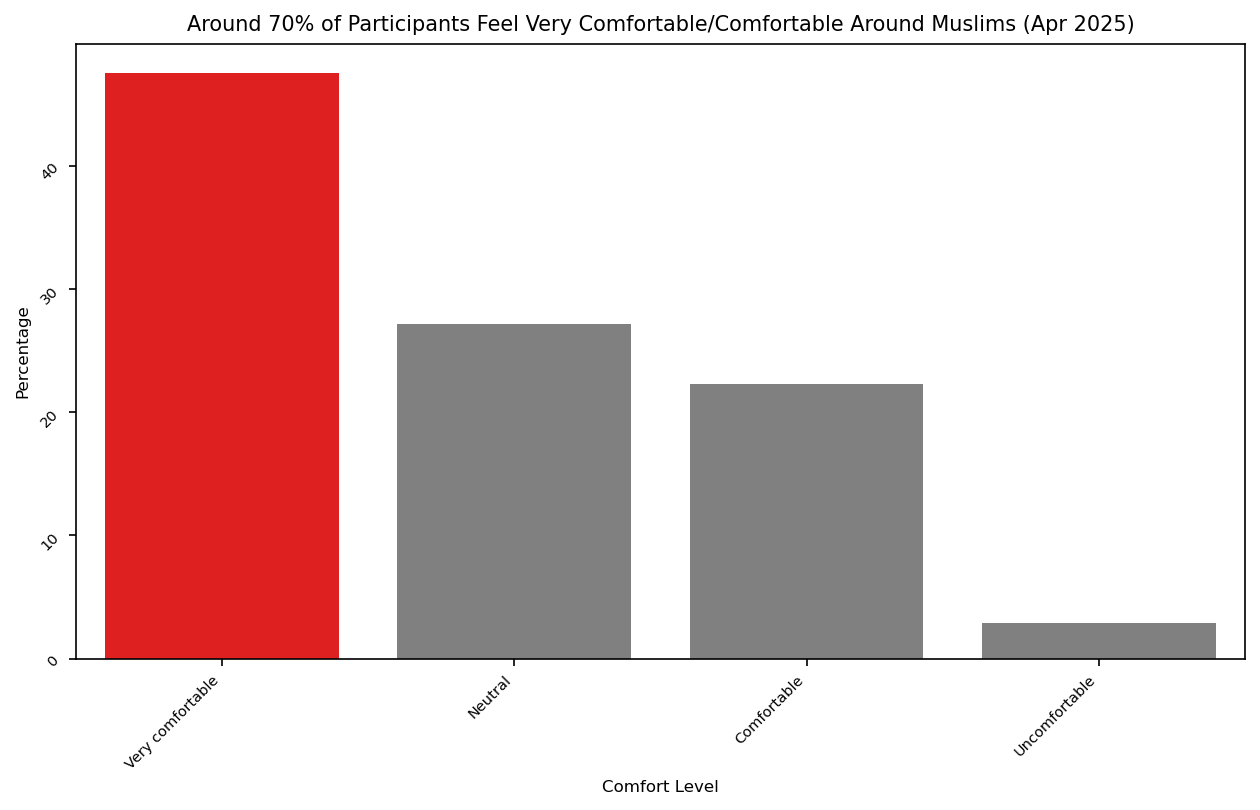

In [96]:
plot_percentages(apr25,'How comfortable do you feel interacting with Muslims in your community?', "Comfort Level",\
                 'Around 70% of Participants Feel Very Comfortable/Comfortable Around Muslims (Apr 2025)')

In [94]:
counts_df = apr25['How comfortable do you feel interacting with Muslims in your community?'].value_counts(normalize=True).reset_index()

In [95]:
counts_df

,index,How comfortable do you feel interacting with Muslims in your community?
0,Very comfortable,0.475728
1,Neutral,0.271845
2,Comfortable,0.223301
3,Uncomfortable,0.029126


# Distribution of Religion

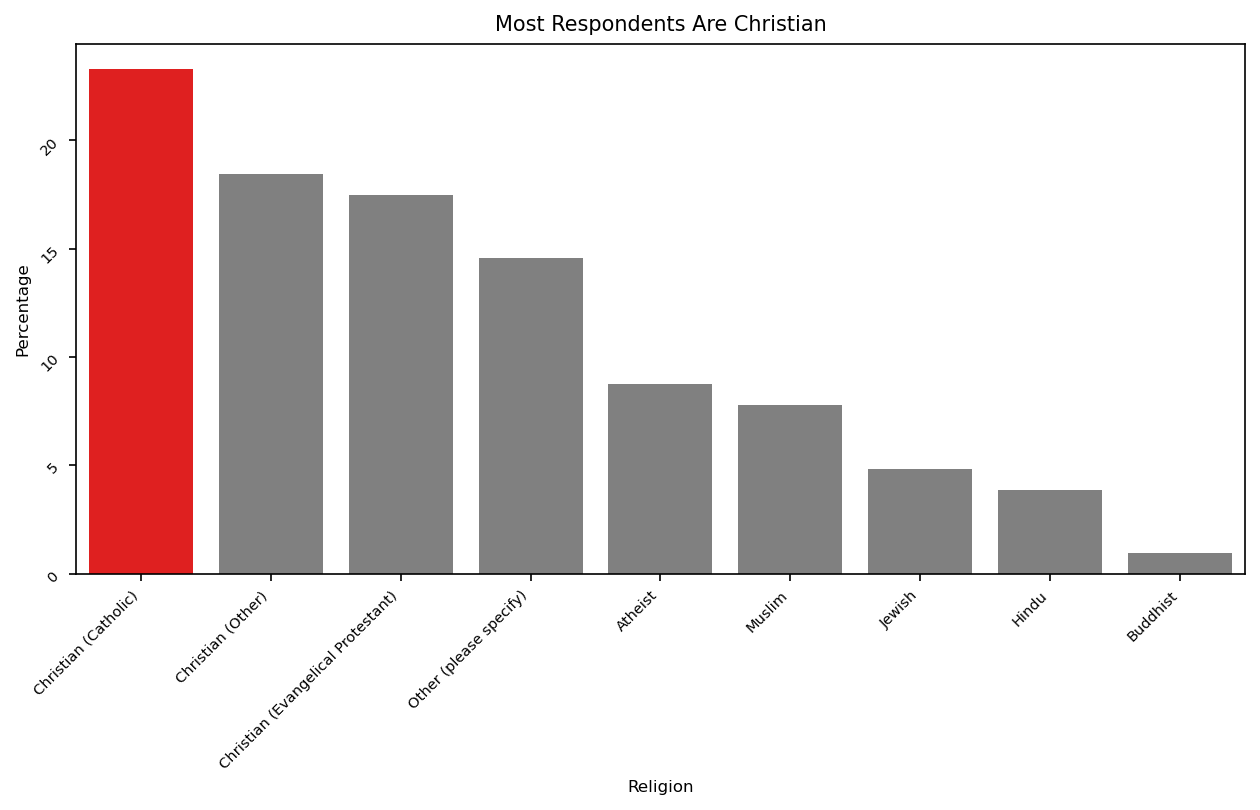

In [118]:
plot_percentages(apr25,'What is your religion?', 'Religion', 'Most Respondents Are Christian')

In [101]:
apr25['What is your religion?'].value_counts(normalize= True)

Christian (Catholic)                  0.233010
Christian (Other)                     0.184466
Christian (Evangelical Protestant)    0.174757
Other (please specify)                0.145631
Atheist                               0.087379
Muslim                                0.077670
Jewish                                0.048544
Hindu                                 0.038835
Buddhist                              0.009709
Name: What is your religion?, dtype: float64

In [117]:
apr25.loc[apr25['What is your religion?'] == 'Other (please specify)']['Religion_other']


1                                             Espiscopal
6                                     Non denominational
8                                                  Fuuuj
13                                    I have no religion
19     Snarling deistic agnostic with a chip on his s...
20                                                   NaN
23                                                  None
35                        Latter-day Saint (i.e. Mormon)
42                                               nothing
53                                                   Tub
79                                     humanist agnostic
82                                              personal
89                                             Spiritual
101                                                  NaN
102                                                  LDS
Name: Religion_other, dtype: object

# Religious Differences in Attitudes Toward Muslims

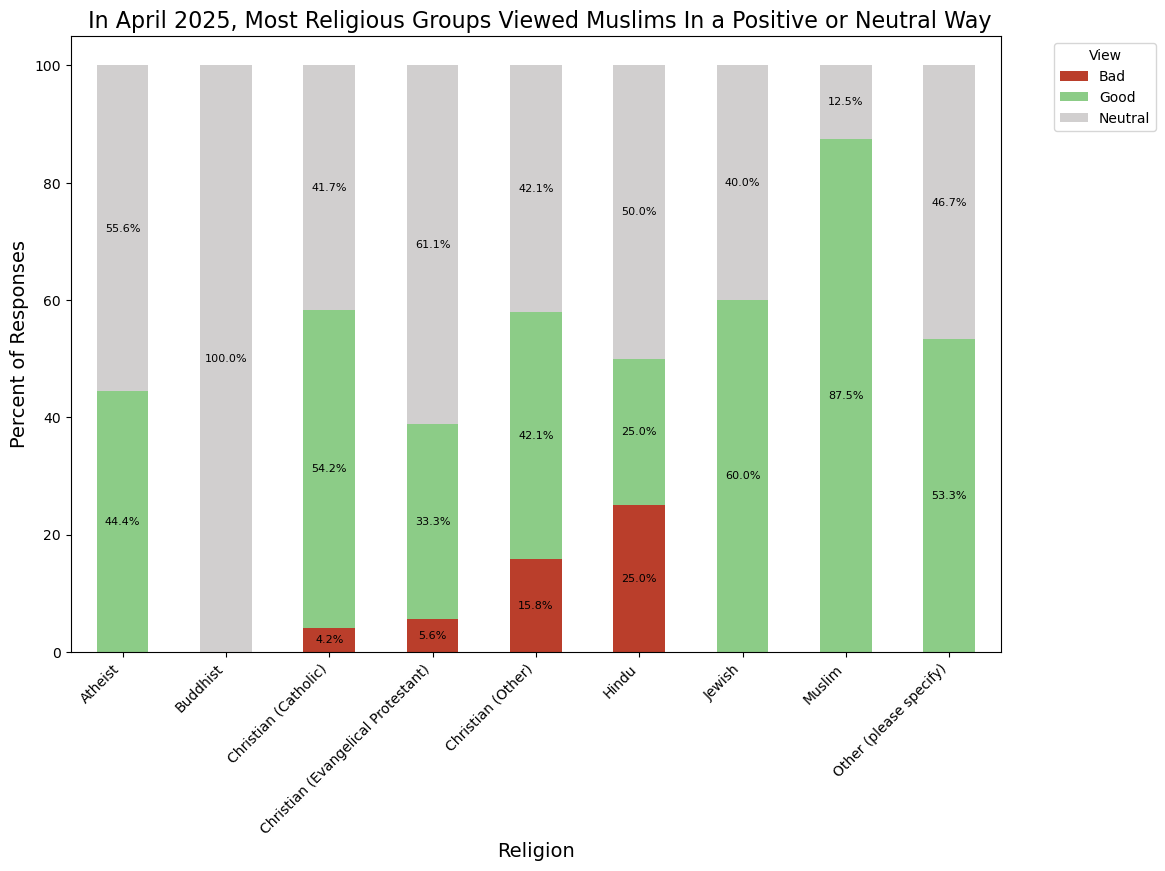

<Figure size 7200x4000 with 0 Axes>

In [119]:
plot_stacked_bar_chart(
    df=apr25,  
    title=' In April 2025, Most Religious Groups Viewed Muslims In a Positive or Neutral Way',
    xlabel='Religion',
    ylabel='Percent of Responses',
    cat_col='What is your religion?',
    sent_col='How do you feel about Muslim people in America?',
)

No group was overwhelmingly negative—most respondents across all groups held neutral or favorable views.

Muslims themselves reported the most positive views (87.5%), followed by Jewish respondents (60%) and “Other” religious identities (53.3%).

Christian groups showed more variation:

Catholics and Evangelical Protestants leaned neutral or positive (with low "bad" ratings).

Christian (Other) had the highest negative view (15.8%) among Christian subgroups.

Hindus had a significant share of negative views (25%), the highest of any group shown. They seem to remain consistent with their views throughout the months surveyed

Buddhists reported only neutral perceptions—100% of their responses were neither positive nor negative. In January 2025,Buddhists reported mixed feelings of both positive and neutral but it seems that the sentiment has shifted towards a more neutral side

Atheists were almost evenly split: 44.4% positive, 55.6% neutral, with no negative sentiments



# Breakdown of Comfort Level Across Religious Groups

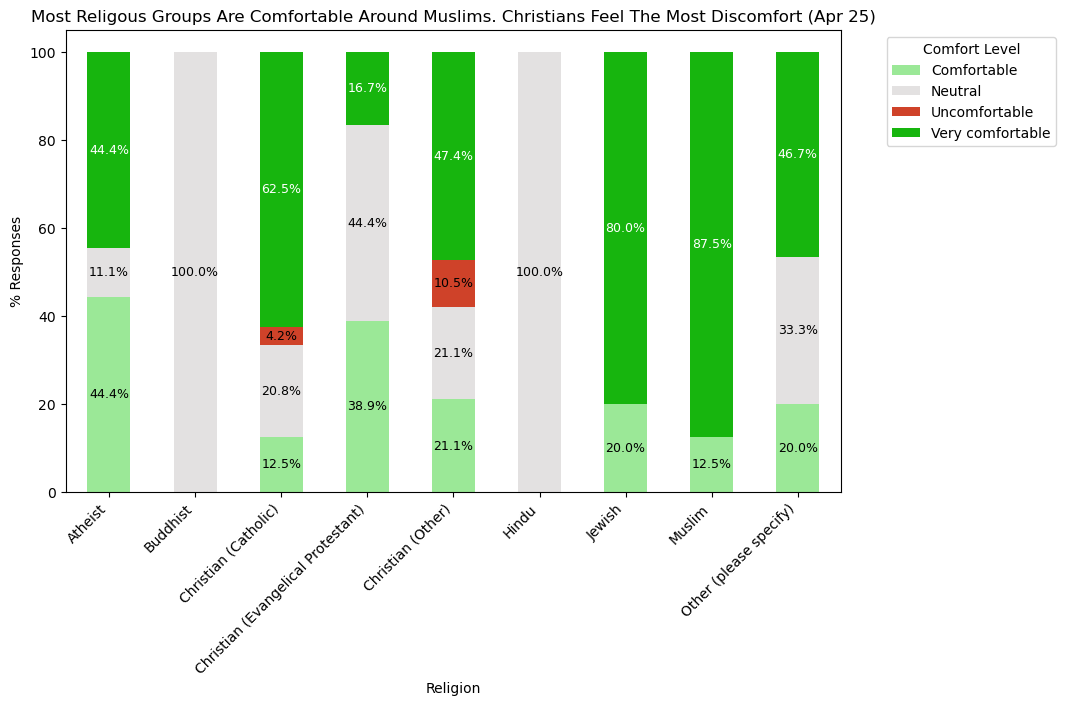

In [122]:
plot_comfort(
    df= apr25, 
    category_col= 'What is your religion?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Most Religous Groups Are Comfortable Around Muslims. Christians Feel The Most Discomfort (Apr 25)',
    xlabel='Religion',
    ylabel='% Responses',
)


Muslims again showed the highest internal comfort: 87.5% felt very comfortable.

Jewish respondents also reported high comfort, with 80% very comfortable and 20% comfortable — 0% neutral or uncomfortable.

Atheists were evenly split: 44.4% comfortable, 44.4% very comfortable, and only 11.1% neutral.

Christian (Catholic) and Evangelical Protestants leaned toward comfort as well, though Catholics had a small percentage (4.2%) feeling uncomfortable.

Christian (Other) respondents stood out with 10.5% feeling uncomfortable — the highest discomfort level among all groups.

Buddhists and Hindus were entirely neutral (100%), suggesting uncertainty or unfamiliarity more than active discomfort.

"Other" religions were split, with 66.7% comfortable/very comfortable and a significant 33.3% neutral.



# Educational Differences in Attitudes Towards Muslims

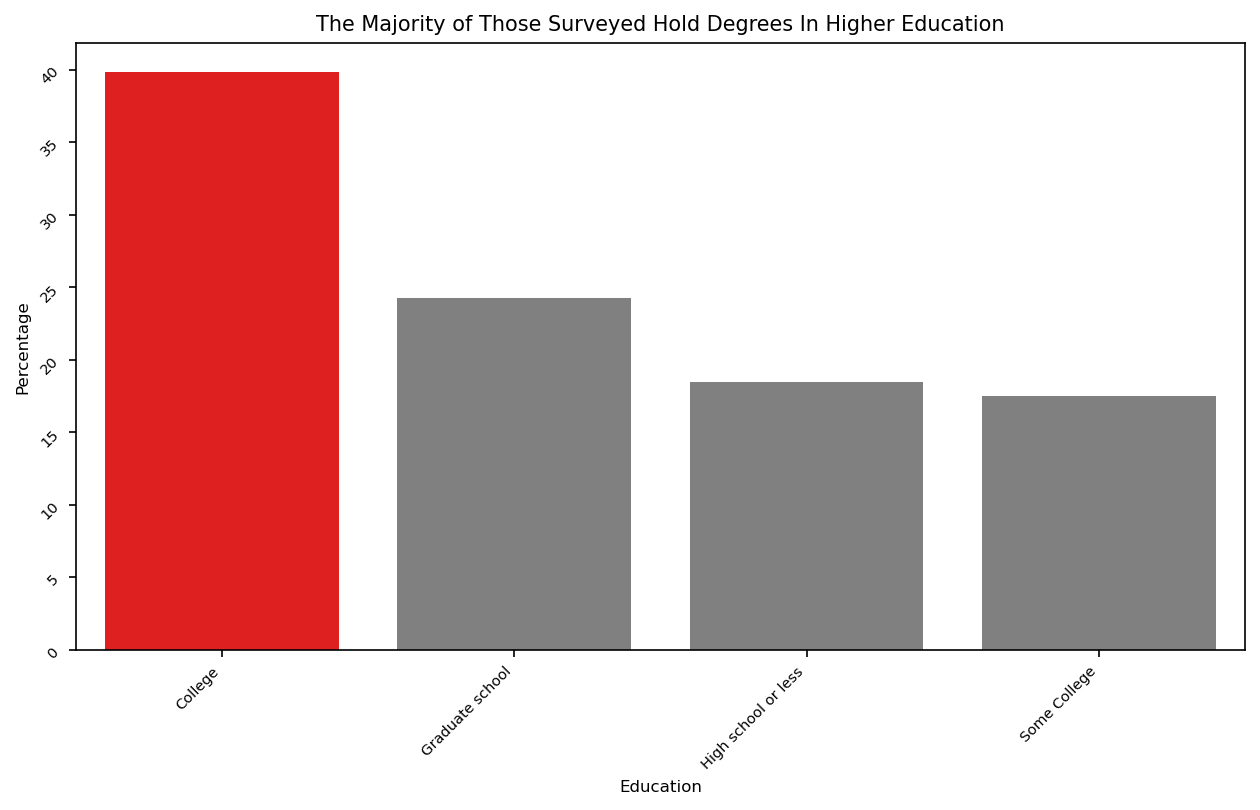

In [124]:
plot_percentages(apr25,'What is your level of education?', 'Education',
           'The Majority of Those Surveyed Hold Degrees In Higher Education')

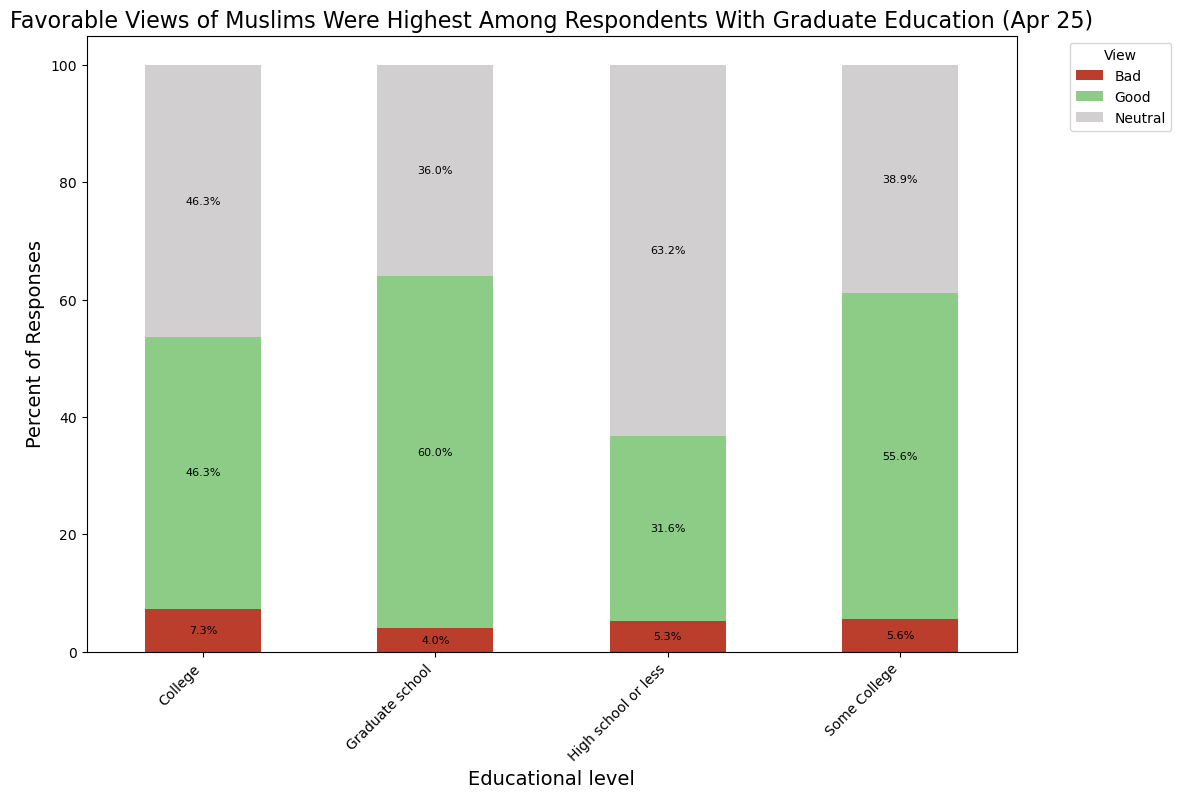

<Figure size 7200x4000 with 0 Axes>

In [126]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Favorable Views of Muslims Were Highest Among Respondents With Graduate Education (Apr 25)',
    xlabel='Educational level',
    ylabel='Percent of Responses',
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

Graduate school respondents had the highest proportion of favorable views (60%) and the lowest share of negative views (4%).

College and some college respondents also showed strong positivity (46–56%), with neutral responses fairly common.

High school or less had the lowest favorable rating (31.6%) and the highest neutral response rate (63.2%), suggesting more uncertainty or lack of familiarity.

Across all education levels, outright negative views remained low, ranging from 4% to 7.3%.

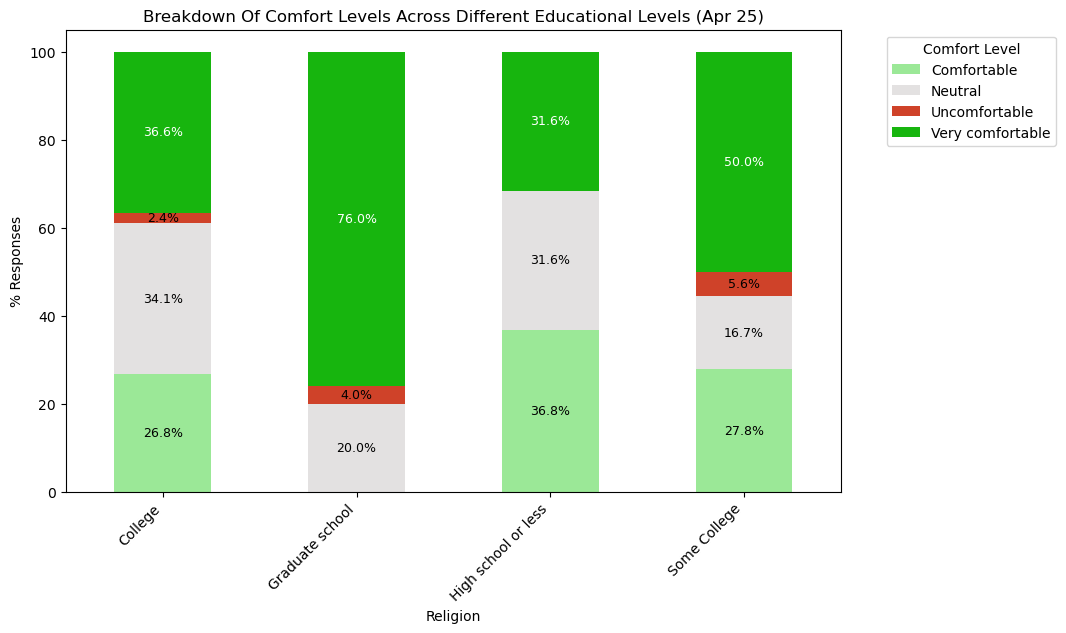

In [128]:
plot_comfort(
    df= apr25, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educational Levels (Apr 25)',
    xlabel='Religion',
    ylabel='% Responses',
)

Between January and April 2025, reported discomfort toward Muslims emerged across all educational levels — with the exception of the “High School or Less” group — where previously no discomfort had been recorded.

In the “College” group, there was a modest increase in neutral responses (from 30.8% to 34.1%), accompanied by a slight decline in both “Comfortable” and “Very Comfortable” sentiments. This shift suggests a growing sense of indifference, along with the introduction of some discomfort (2.4%).

Among those with a graduate-level education, the data shows a notable 25-point increase in “Very Comfortable” responses (from 51.4% to 76%). However, this shift is not purely positive—there was also a small uptick in both neutrality and discomfort (from 0% to 4.0%).

For respondents with “Some College” education, the percentage reporting “Very Comfortable” rose (from 36.4% to 50%), but this came alongside a drop in neutrality and the introduction of discomfort (5.6%), suggesting a mild polarization.

# Age Differences in Attitudes Towards Muslims

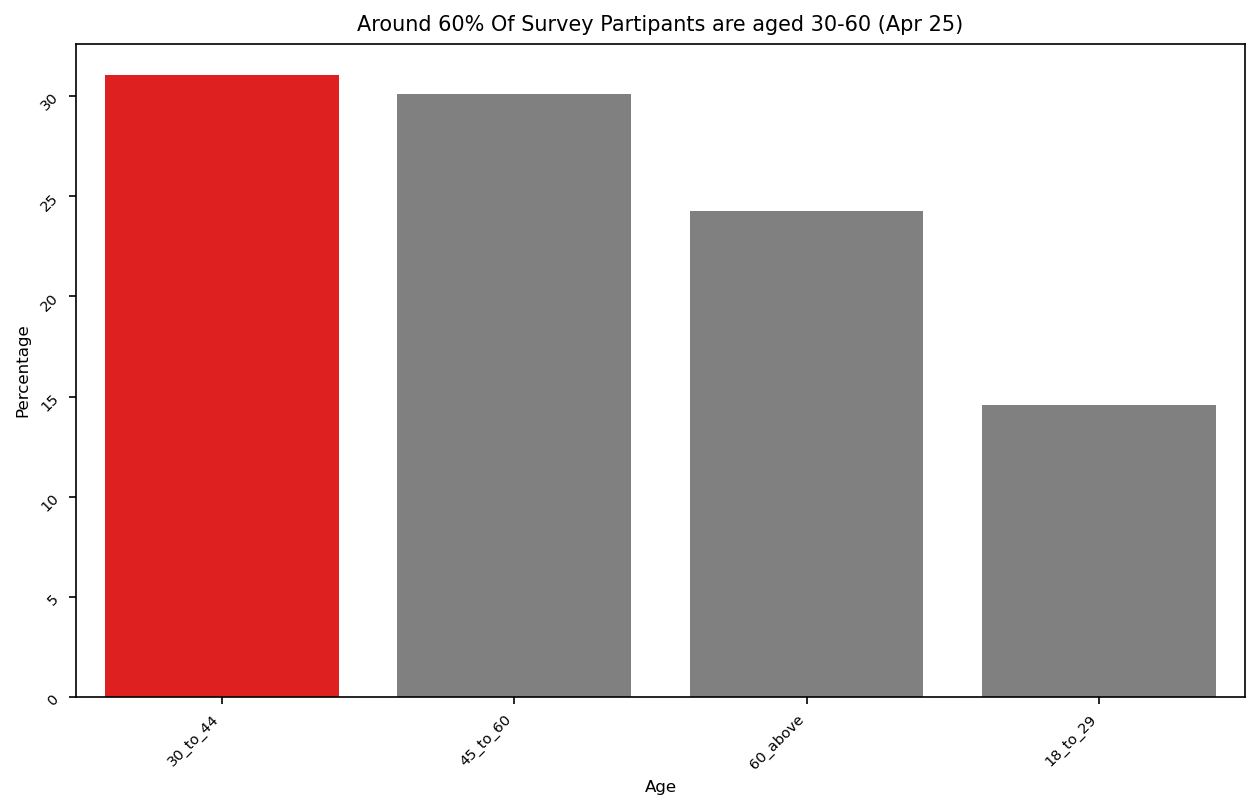

In [130]:
plot_percentages(apr25,'Age', 'Age',
           'Around 60% Of Survey Partipants are aged 30-60 (Apr 25)')

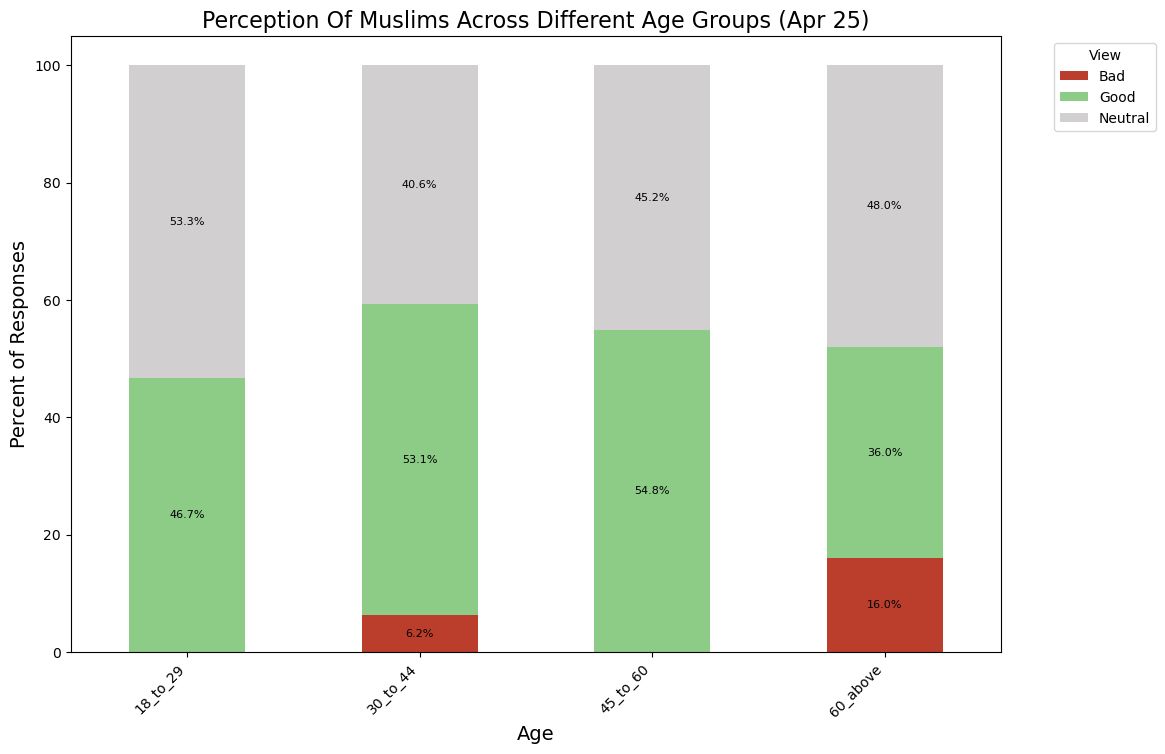

<Figure size 7200x4000 with 0 Axes>

In [131]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Perception Of Muslims Across Different Age Groups (Apr 25)',
    xlabel='Age',
    ylabel='Percent of Responses',
    cat_col='Age',
    sent_col='How do you feel about Muslim people in America?'
)

Between January and April 2025, perceptions of Muslims shifted notably at both ends of the age spectrum.

Among 18–29-year-olds, the proportion expressing negative views dropped from 4.8% to 0%, signaling a complete disappearance of negative sentiment in this group. However, this came with an increase in neutrality, possibly suggesting growing ambivalence.

In contrast, among those 60 and older, negative sentiment rose sharply from 0% to 16%, accompanied by a drop in positive views. What was previously a near-even split between “Good” and “Neutral” is now more polarized, with a significant portion reporting negative views.

For the 30–44 age group, there was a decline in positive sentiment (from 64.5% to 53.1%) and an increase in neutrality, indicating a shift away from strong positivity toward more neutral or uncertain views.

The 45–60 age group stands out as the only segment that moved in a consistently positive direction, with “Good” responses rising from 37.9% to 54.8%, while neutrality decreased and negative views disappeared.

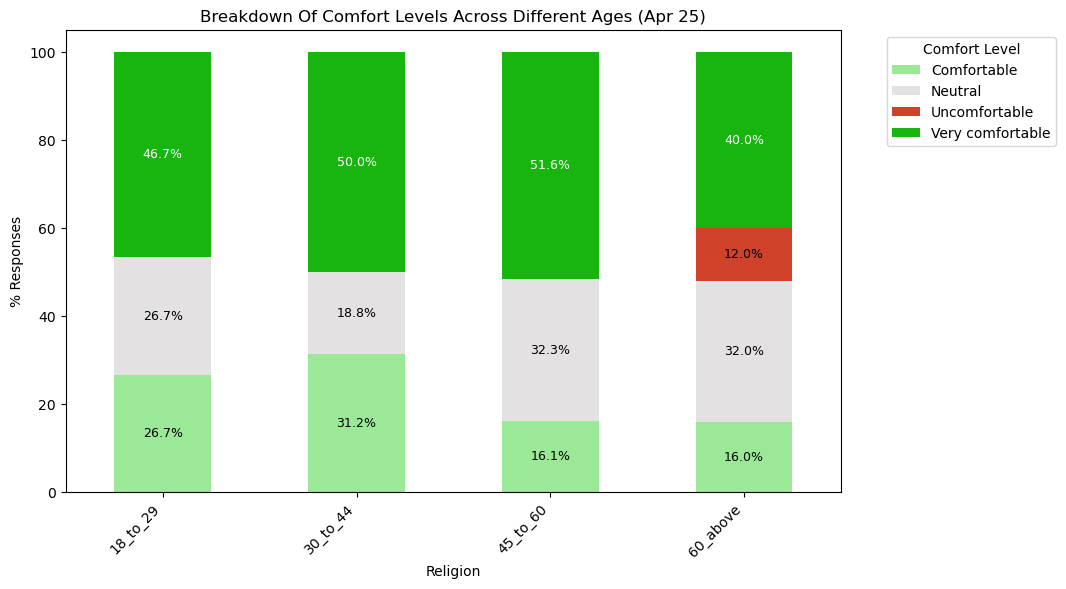

In [133]:
plot_comfort(
    df= apr25, 
    category_col= 'Age',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Ages (Apr 25)',
    xlabel='Religion',
    ylabel='% Responses',
)

Discomfort emerged only in the 60+ age group. All other groups maintained or increased their “very comfortable” stance. This is in comparison to the data obtained in January 2025

# Income-based Differences in Attitudes Towards Muslims

In [134]:
apr25['Household Income'].value_counts()

25000_to_49999      30
0_to_9999           14
100000_to_124999    12
75000_to_99999      10
50000_to_74999       9
no_answer            9
10000_to_24999       8
175000_to_199999     4
200000_and_up        3
150000_to_174999     2
125000_to_149999     2
Name: Household Income, dtype: int64

In [135]:
income_mapping = {"25000_to_49999": "25k-49k",
"50000_to_74999":"50k-74k",
"75000_to_99999": "75k-99k",
"125000_to_149999": "125k-149k",
"100000_to_124999" :"100k-124k",
"0_to_9999"        : "0-9k",
"no_answer":    "undisclosed",
"150000_to_174999":"150k-174k",
"10000_to_24999" : "10k-24k",
"200000_and_up":   "200k_up",
"175000_to_199999": "175k-199k"}

apr25['Household Income'] = apr25['Household Income'].replace(income_mapping)

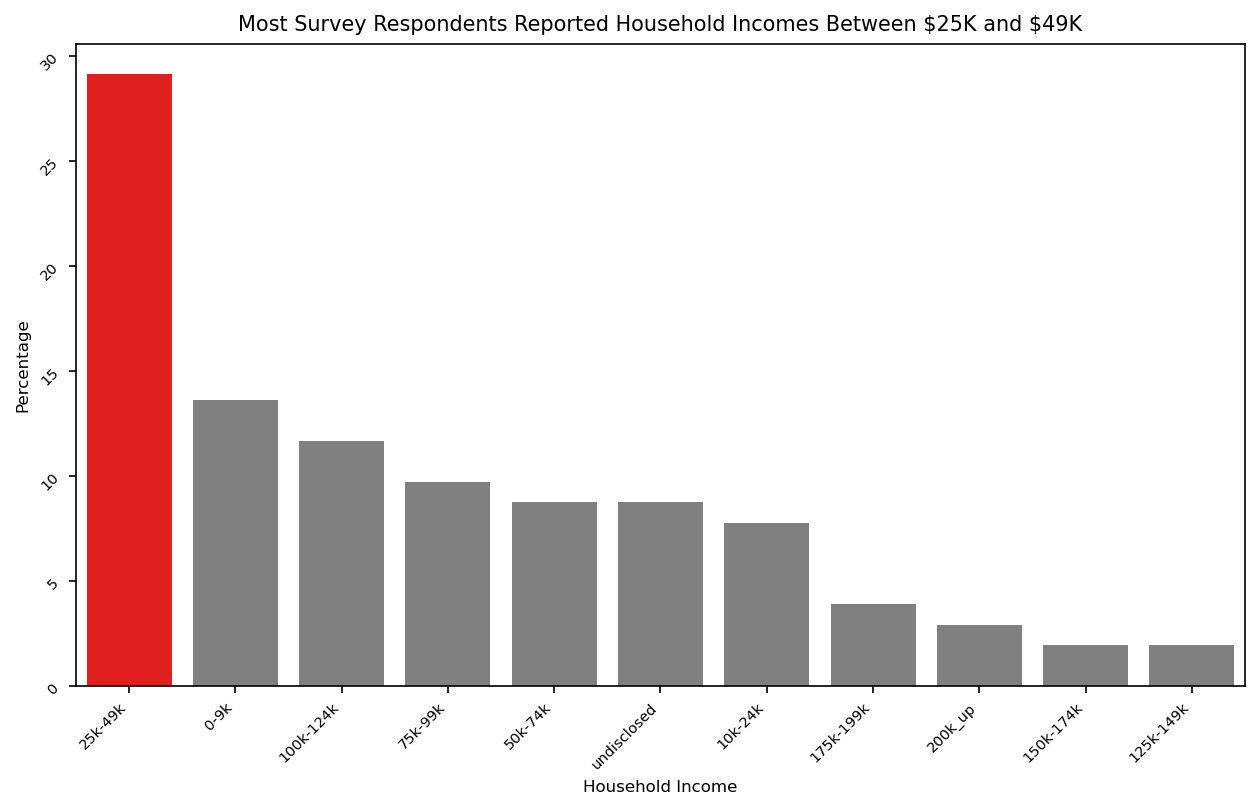

In [144]:
plot_percentages(apr25,'Household Income', 'Household Income',
           'Most Survey Respondents Reported Household Incomes Between \$25K and \$49K')

In [139]:
apr25['Household Income'].value_counts(normalize= True)

25k-49k        0.291262
0-9k           0.135922
100k-124k      0.116505
75k-99k        0.097087
50k-74k        0.087379
undisclosed    0.087379
10k-24k        0.077670
175k-199k      0.038835
200k_up        0.029126
150k-174k      0.019417
125k-149k      0.019417
Name: Household Income, dtype: float64

In [145]:
def plot_income(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View', cat_order=None):


    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral': '#d1cfcf'
    }

    if cat_order:
        df[cat_col] = pd.Categorical(df[cat_col], categories=cat_order, ordered=True)

    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)

    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), 
                                 color=[colors[col] for col in grouped_percentage.columns])
    

    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0: 
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

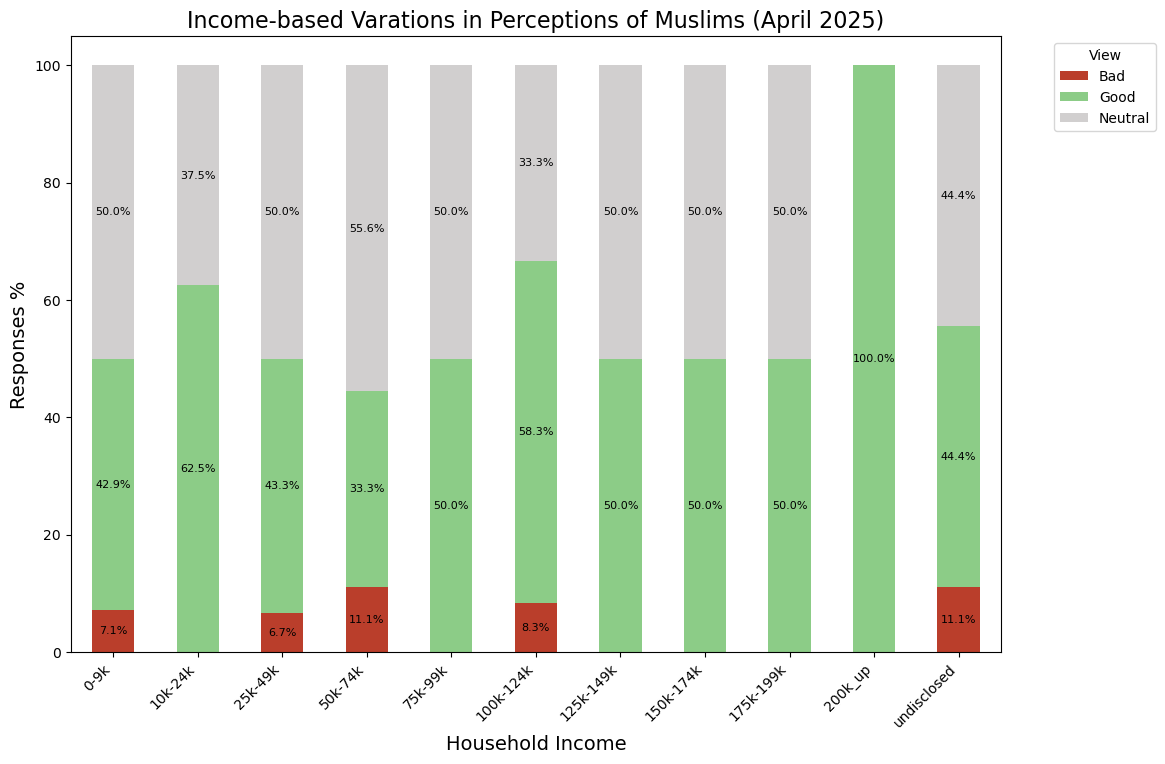

In [147]:
order = ['0-9k', '10k-24k', '25k-49k', '50k-74k', '75k-99k', 
         '100k-124k', '125k-149k', '150k-174k', '175k-199k', '200k_up', 'undisclosed']

plot_income(
    df=apr25, 
    title='Income-based Varations in Perceptions of Muslims (April 2025)',
    xlabel='Household Income',
    ylabel='Responses %',
    cat_col='Household Income',
    sent_col='How do you feel about Muslim people in America?',
    cat_order=order
)

Negative perceptions of Muslims have not only persisted but shifted across income groups between October 2024 and April 2025.

In October 2024, negative sentiment was reported across a wide range of income brackets,including both low-income groups (e.g., 0–9k and 10k–24k) and higher-income groups (e.g., 100k–124k, 150k–174k, and even 200k+).

By January 2025, many of these negative views had disappeared, with only two income brackets showing any disapprova (25k-49k and 50k-75k)

However, in April 2025, we observe a reemergence and redistribution of negative sentiment—this time more concentrated in the middle-income ranges (50k–74k, 100k–124k, $undisclosed) and absent in the higher brackets (150k+), indicating that discomfort did not vanish but shifted socioeconomically.

This trend suggests that attitudes are fluid, and while negativity receded temporarily in January, it returned in April, albeit among different income groups.


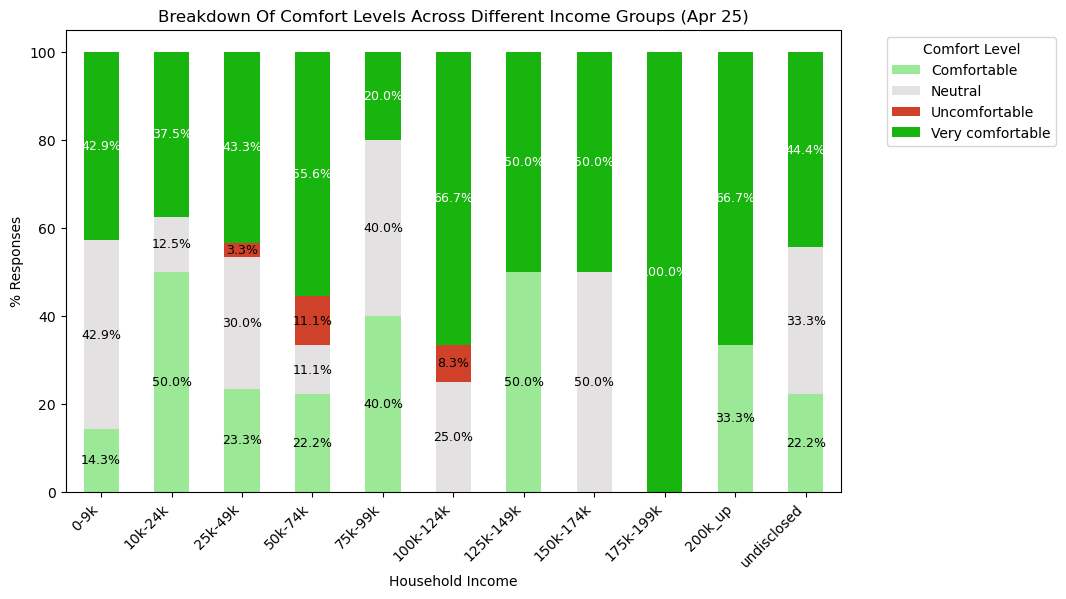

In [152]:
plot_comfort(
    df= apr25, 
    category_col= 'Household Income',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Income Groups (Apr 25)',
    xlabel='Household Income',
    ylabel='% Responses',
)

Higher-income brackets, particularly those earning between 175K–199K and 200K or more, showed the highest levels of comfort, with 100% of respondents in the 175K–199K group reporting feeling "very comfortable." 
Meanwhile, lower and middle-income groups such as 50K–74K and 100K–124K exhibited the most discomfort, with 11.1% and 8.3% of respondents, respectively, reporting feeling "uncomfortable."

While most income brackets leaned toward positive sentiment, the data also show that neutral responses were fairly common, particularly among those in the 0-9K and 25K–49K ranges, suggesting a more ambivalent stance in these groups

# Regional Differences in Perceptions Of Muslims

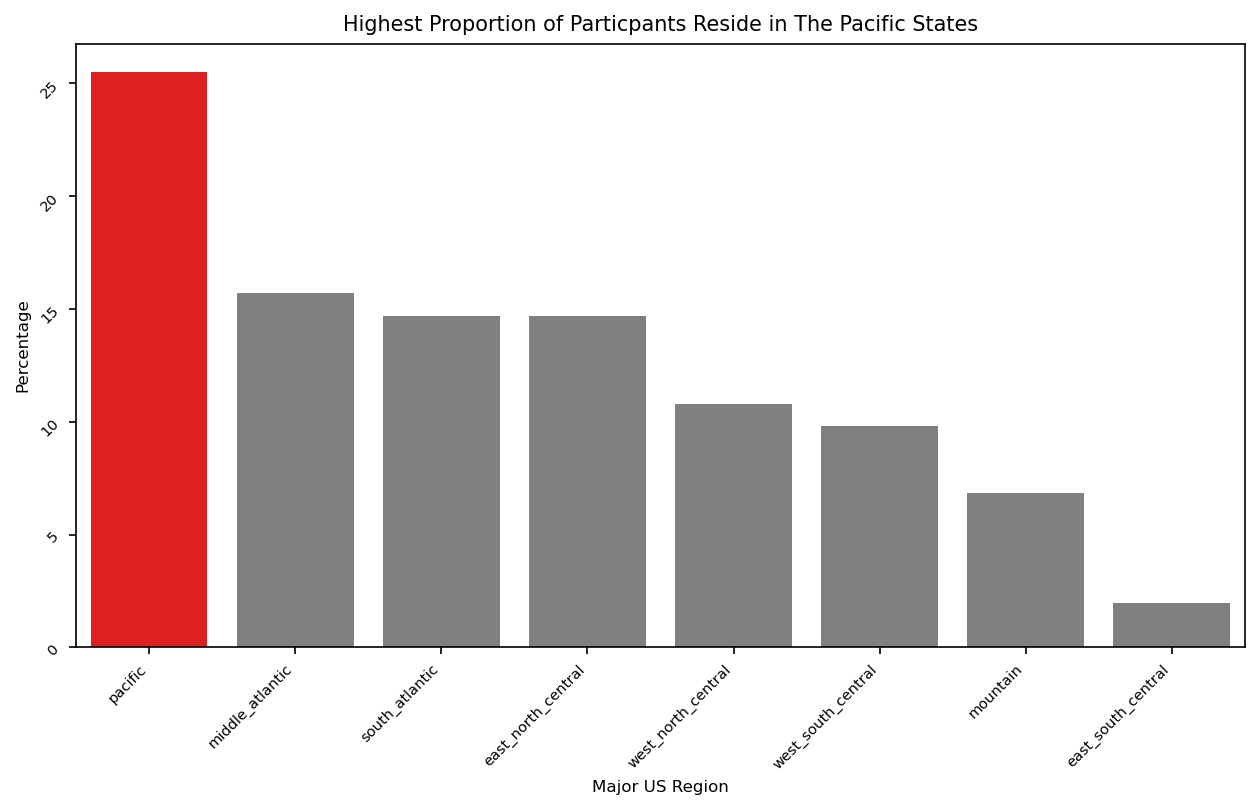

In [149]:
plot_percentages(apr25,'Major US Region', 'Major US Region',
                 'Highest Proportion of Particpants Reside in The Pacific States')

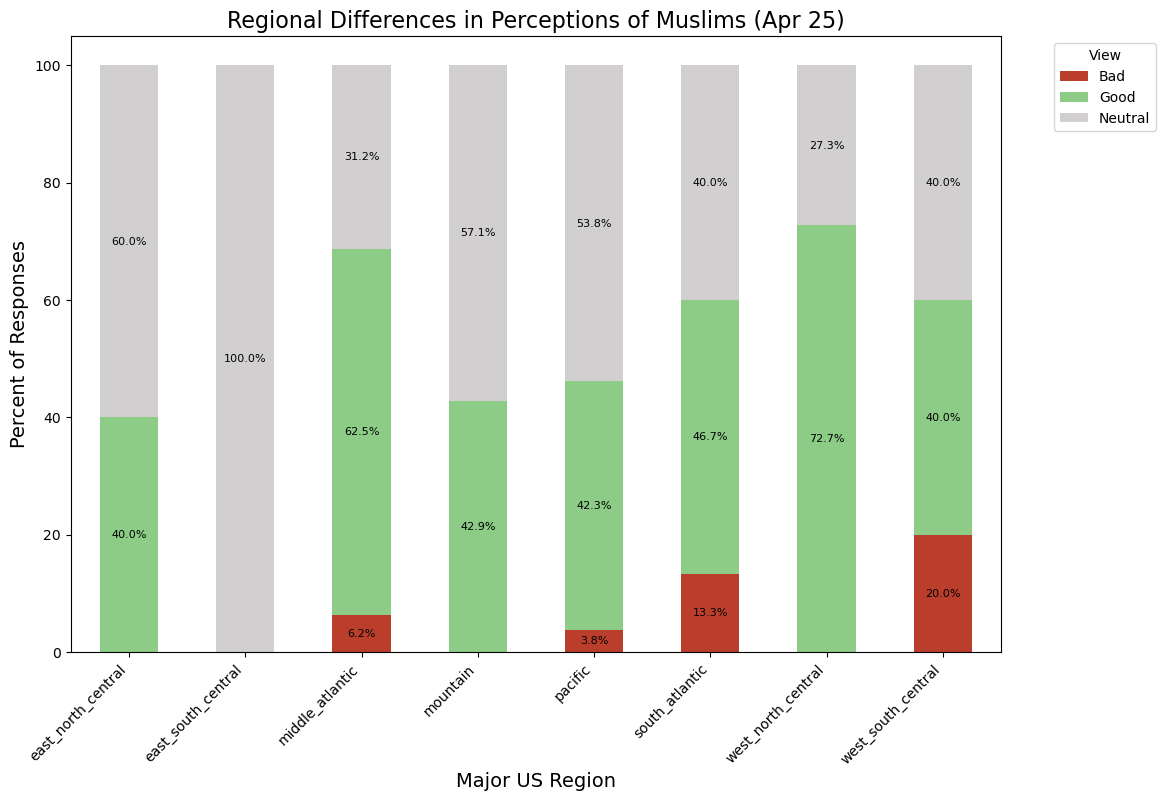

<Figure size 7200x4000 with 0 Axes>

In [151]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Regional Differences in Perceptions of Muslims (Apr 25)',
    xlabel='Major US Region',
    ylabel='Percent of Responses',
    cat_col='Major US Region',
    sent_col='How do you feel about Muslim people in America?'
)

Unfavorable views were most concentrated in the West South Central region, which includes Arkansas, Louisiana, Oklahoma, and Texas, where 20% of respondents reported negative perceptions of Muslims. The South Atlantic region—comprising Delaware, Maryland, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, and Washington, D.C.—followed with 13.3% expressing unfavorable views.

In contrast, the West North Central region (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota) stood out for its high positivity, with nearly 73% of respondents reporting favorable views and only 27% expressing neutrality—no respondents in this region reported negative views. Similarly, the Middle Atlantic region (New York, New Jersey, and Pennsylvania) and the Mountain region (e.g., Arizona, Colorado, Utah) showed relatively high levels of favorable sentiment and low levels of negative sentiment.

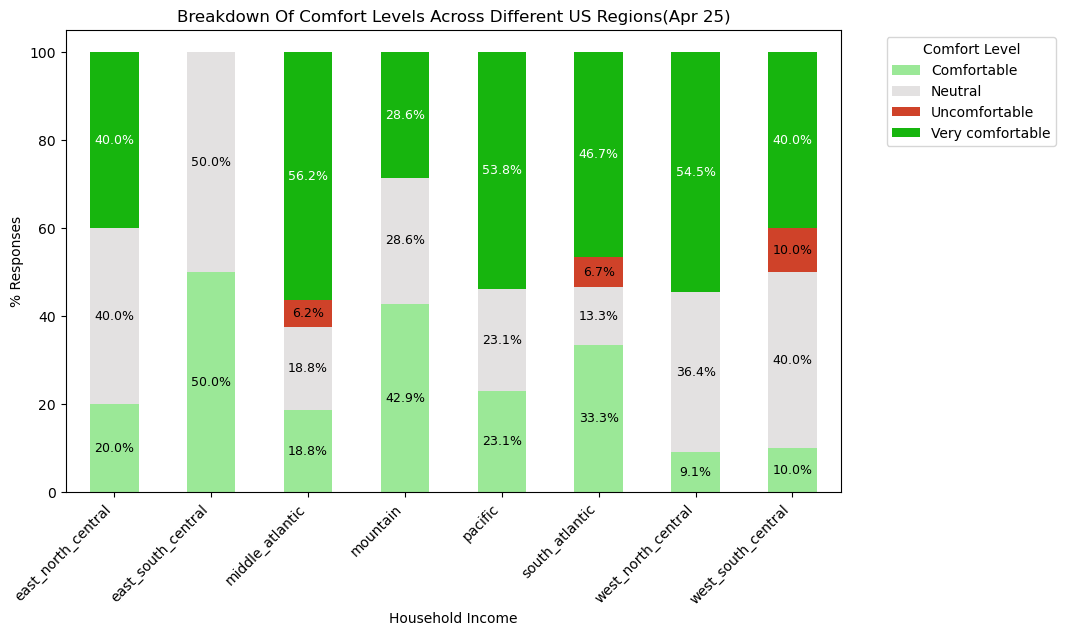

In [154]:
plot_comfort(
    df= apr25, 
    category_col= 'Major US Region',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different US Regions(Apr 25)',
    xlabel='Household Income',
    ylabel='% Responses',
)

# Relationship Between Knowing a Muslim and Sentiment

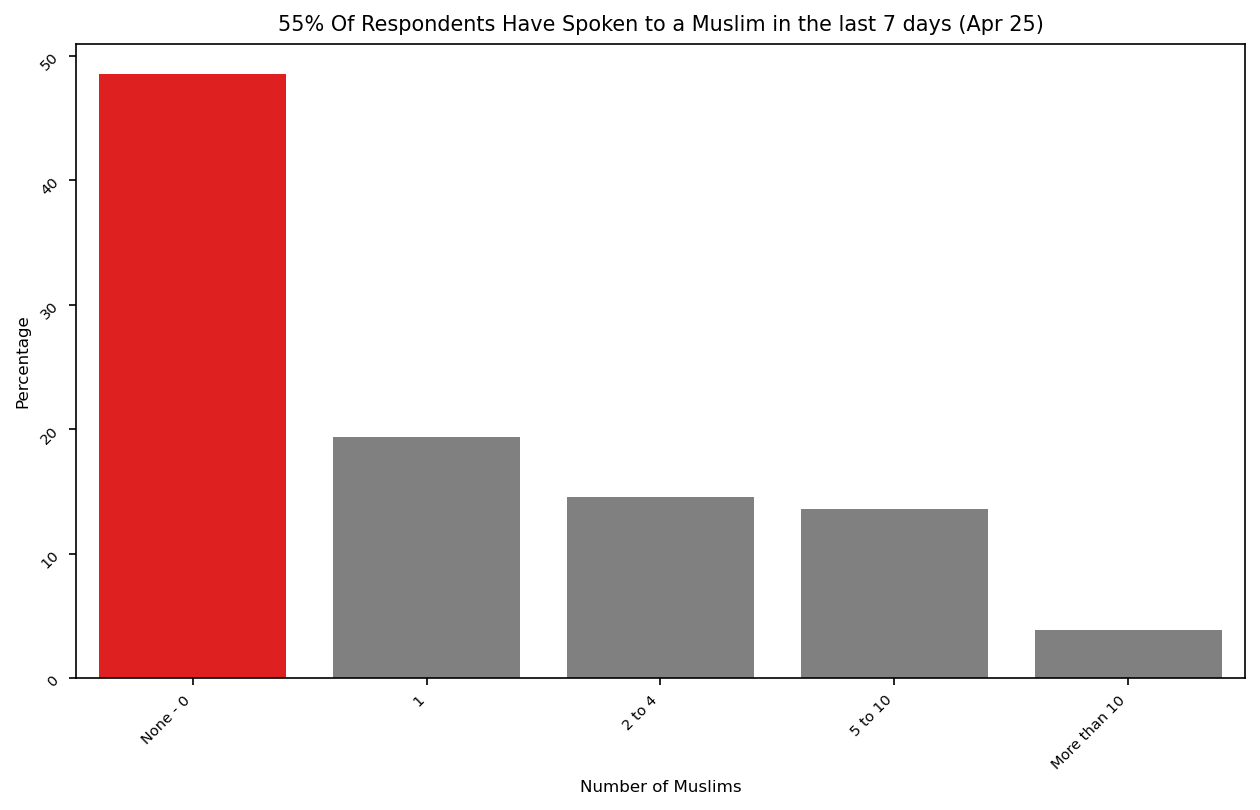

In [157]:
plot_percentages(apr25,'How many muslim people have you talked to in the last 7 days?', 'Number of Muslims',\
           '55% Of Respondents Have Spoken to a Muslim in the last 7 days (Apr 25)')

In [163]:
def plot_stacked_bar_chart_interaction(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    interaction_order = ["None - 0", "1", "2 to 4", "5 to 10", "More than 10"]
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)

    grouped = grouped.reindex(interaction_order)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.figure(figsize=(9, 5), dpi=800)
    plt.show()

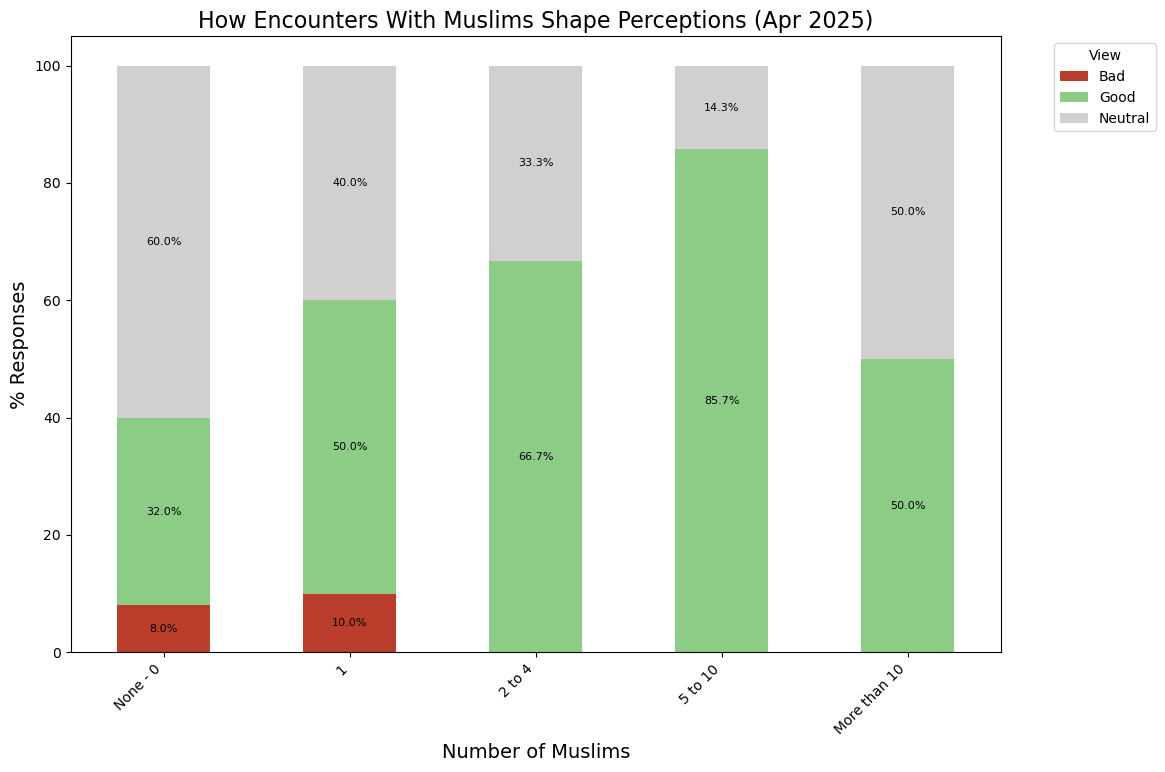

<Figure size 7200x4000 with 0 Axes>

In [164]:
plot_stacked_bar_chart_interaction(
    df=apr25, 
    title='How Encounters With Muslims Shape Perceptions (Apr 2025)',
    xlabel='Number of Muslims',
    ylabel='% Responses',
    cat_col='How many muslim people have you talked to in the last 7 days?',
    sent_col='How do you feel about Muslim people in America?'
)

Positive perceptions of Muslims increased with the number of interactions, peaking among those who interacted with 5 to 10 Muslims. Interestingly, respondents with more than 10 encounters reported a balanced mix of positive and neutral views. 

Those who interacted with just one Muslim showed slightly higher levels of unfavorable views than those with no interactions, but overall held more positive attitudes.

# Relationship Between Primary News Source and Sentiment

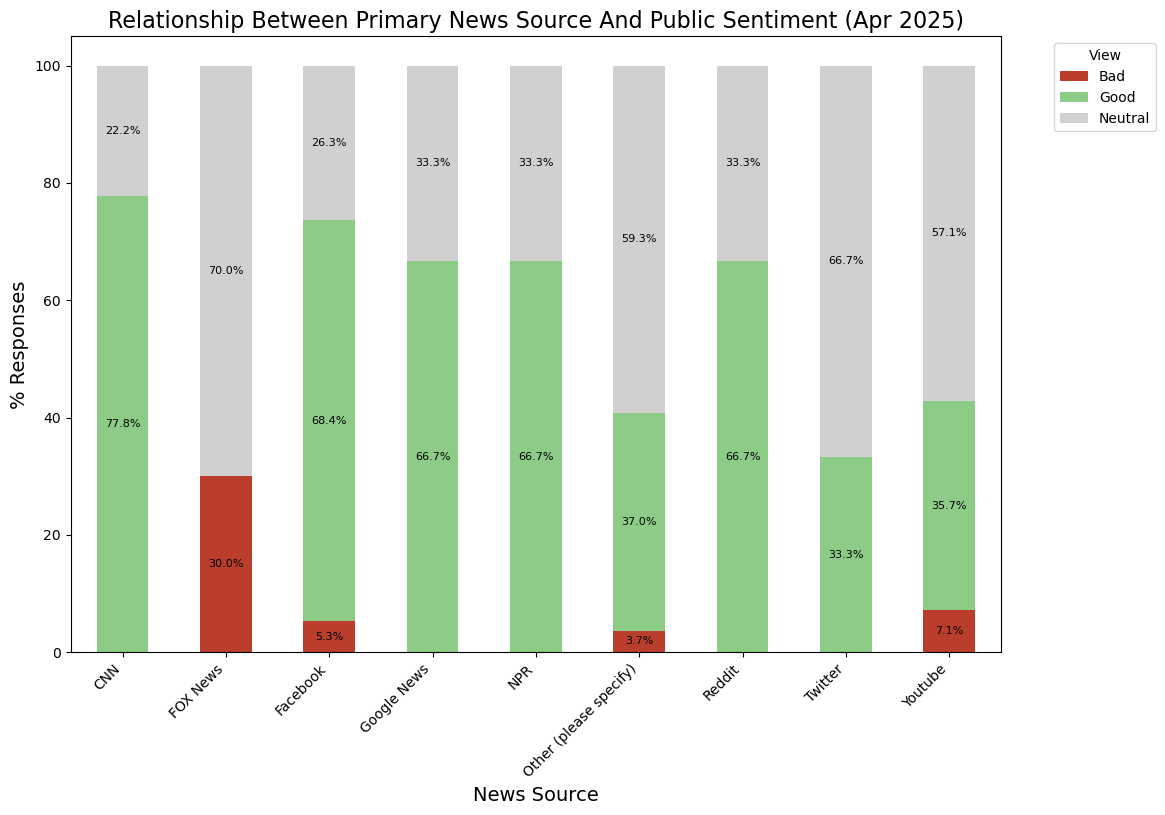

<Figure size 7200x4000 with 0 Axes>

In [166]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Relationship Between Primary News Source And Public Sentiment (Apr 2025)',
    xlabel='News Source',
    ylabel='% Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

Fox news viewers showed the greatest shift in sentiment between January and April 2025. Unfavorable views rose sharply from 11% to 30%, while positive sentiment declined signicantly (from 47% to 0%).
In contrast, CNN audiences remained largely stable, with consistently high levels of positive perception and minimal change over time. Facebook users also held steady, showing a slight increase in favorable views. Viewers of Google News and NPR reported more positive attitudes in April than in January, while sentiment among YouTube users became more negative, with a drop in favorable responses and a rise in unfavorable ones.

In [167]:
apr25[apr25['Where do you get your news from?']== 'Other (please specify)']['News_other']

1                                                CBS,NBC
3                                  Mostly local channels
6                                    AOL news World news
8                                                   Dhuk
11                                                 MSNBC
17                                           Tom Hughes 
19                                 I don't care anymore.
20                                      multiple sources
23                                       New York Times 
29                                             Instagram
36                                                TikTok
40                                                 MSNBC
41                                   iraqi news channels
50     Newsmax for national/world news. locally from ...
51         I don’t watch/consume news on a regular basis
53                                                   Fun
54                                               Tik tok
55                             

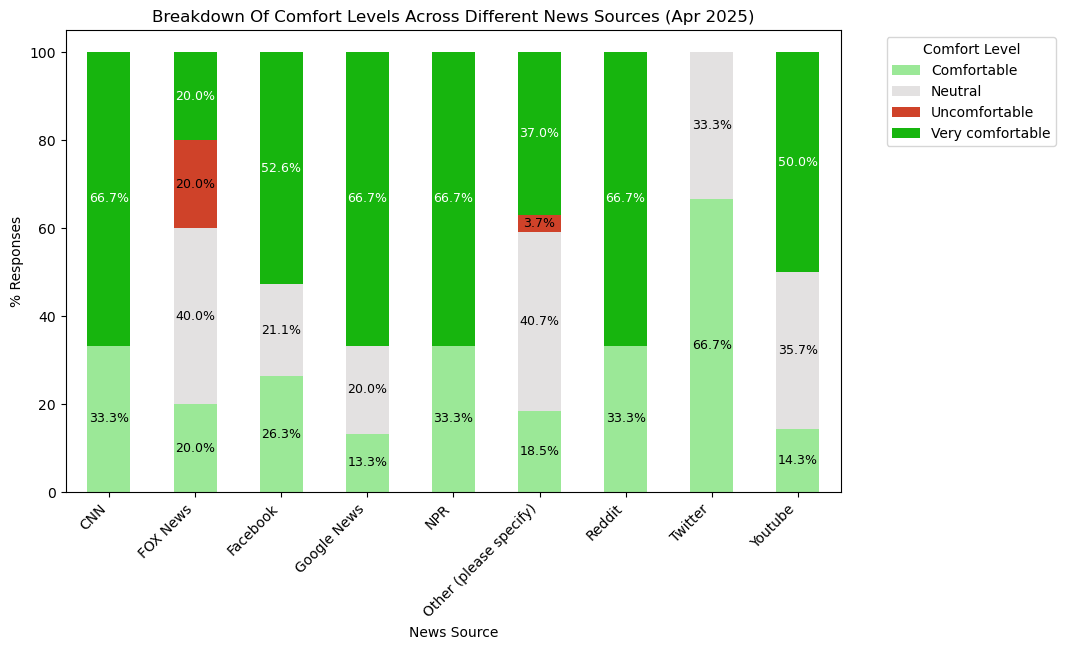

In [197]:
plot_comfort(
    df= apr25, 
    category_col= 'Where do you get your news from?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different News Sources (Apr 2025)',
    xlabel='News Source',
    ylabel='% Responses',
)

Negative perceptions of Muslims did not necessarily align with discomfort in interactions. For example, 40% of FOX News viewers reported feeling either comfortable or very comfortable around Muslims, despite 30% expressing unfavorable views. The remaining respondents were split between neutrality (40%) and discomfort (20%). In contrast, comfort levels increased among CNN, Facebook, and Reddit users compared to January 2025, suggesting a growing ease with Muslims among audiences of those platforms.

# Relationship between Gender and Sentiment

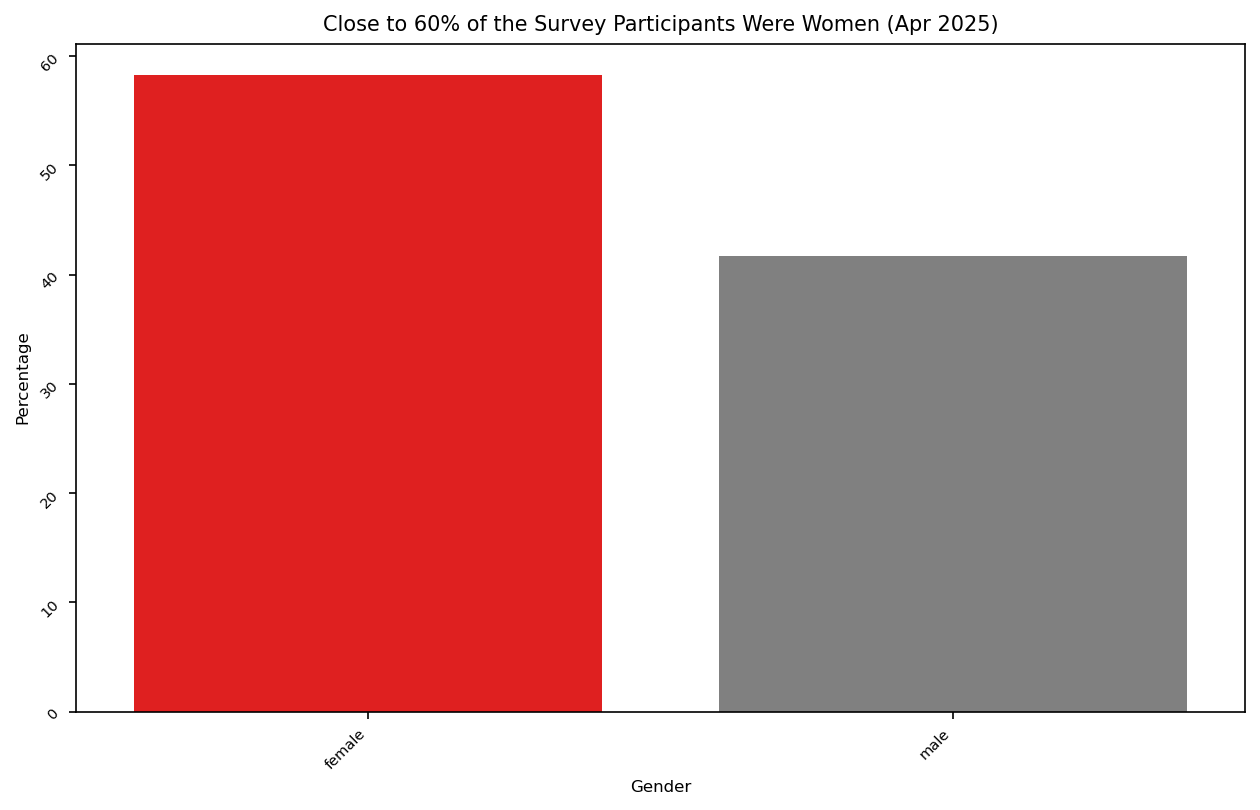

In [171]:
plot_percentages(apr25,'Gender', 'Gender',
           'Close to 60% of the Survey Participants Were Women (Apr 2025)')

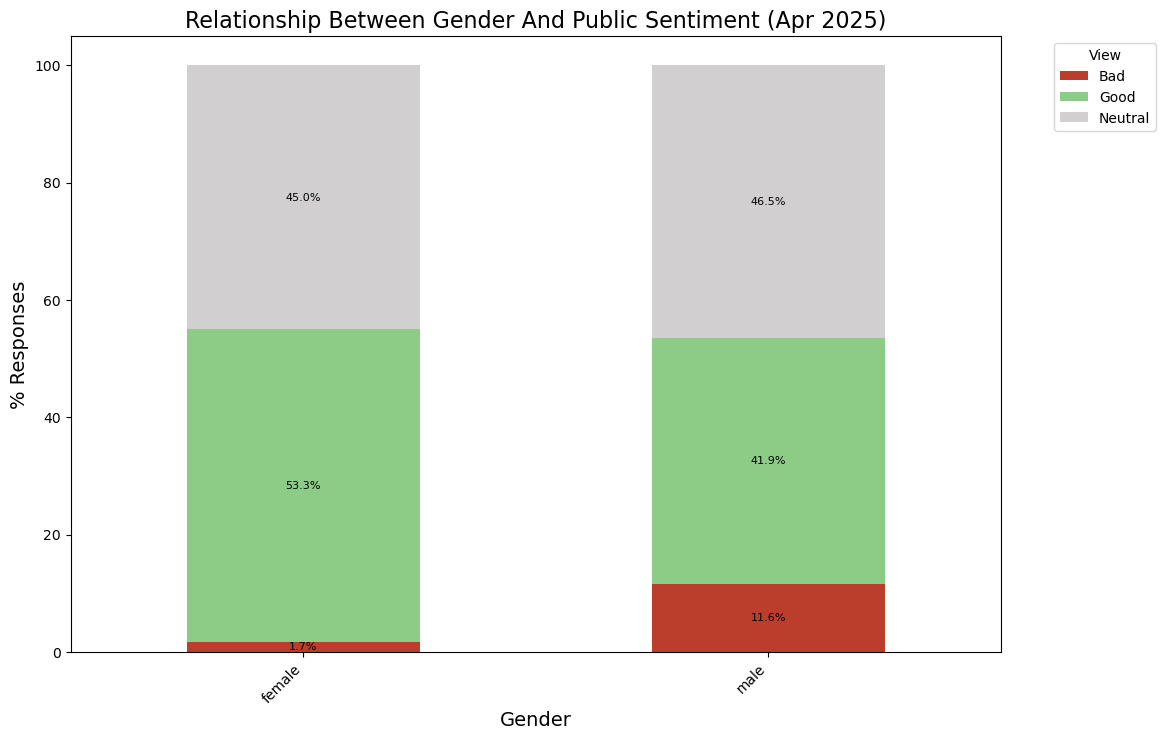

<Figure size 7200x4000 with 0 Axes>

In [172]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Relationship Between Gender And Public Sentiment (Apr 2025)',
    xlabel='Gender',
    ylabel='% Responses',
    cat_col= 'Gender',
    sent_col='How do you feel about Muslim people in America?'
)

Since January 2025, the proportion of men expressing negative views about Muslims in America has more than doubled (5% to 11.6%). Meanwhile, sentiment among women has shifted slightly towards a more positive and neutral side, with a decline in negative perception

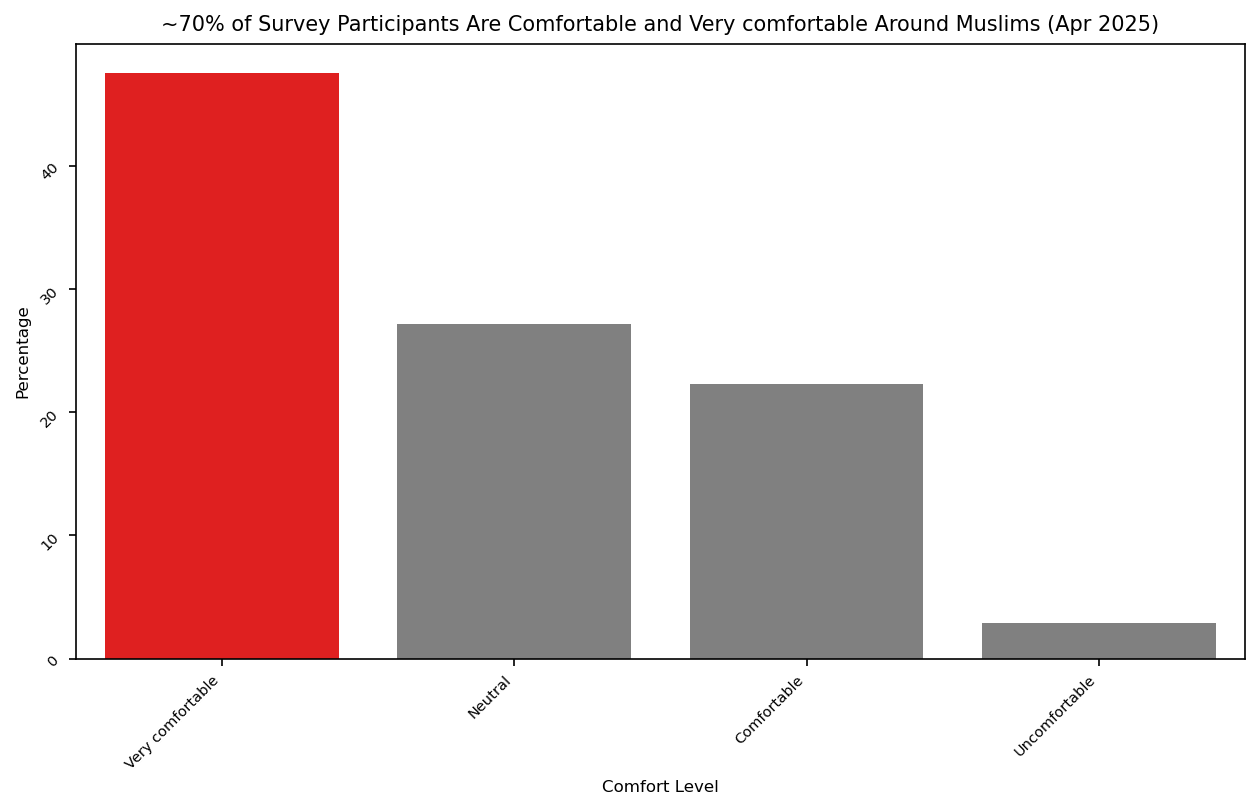

In [174]:
plot_percentages(apr25, 'How comfortable do you feel interacting with Muslims in your community?', \
                 'Comfort Level', '~70% of Survey Participants Are Comfortable and Very comfortable Around Muslims (Apr 2025)')

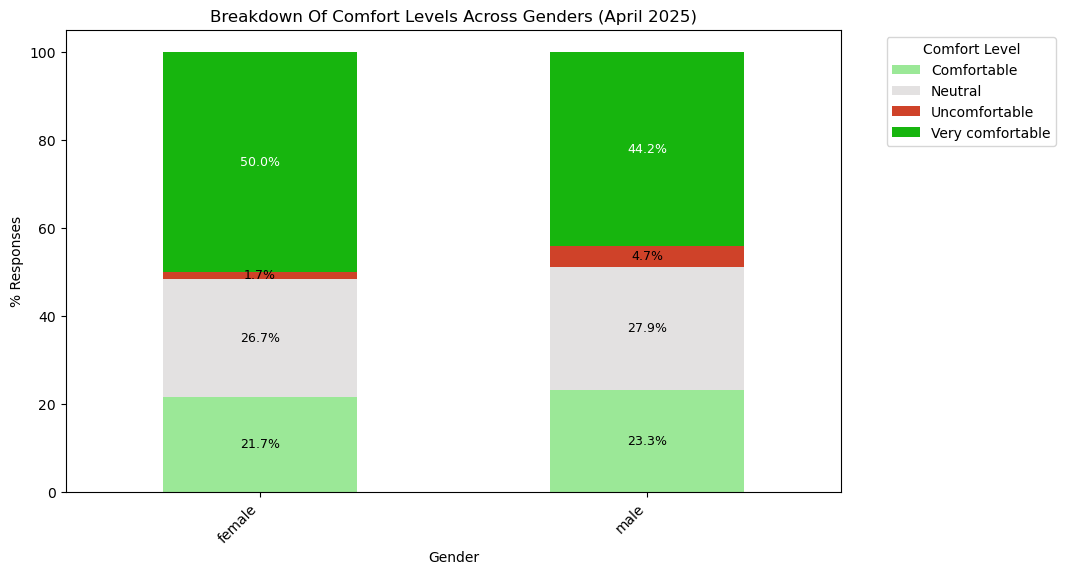

In [176]:
plot_comfort(
    df= apr25, 
    category_col= 'Gender',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Genders (April 2025)',
    xlabel='Gender',
    ylabel='% Responses',
)

Overall, women are more comfortable around Muslims than men. Since Jan 2025, there has been an increase in the level of comfort among women, noted by the "Very Comfortable" category. In contrast,  men's comfort levels have dropped as more men are expressing discomfort or neutrality towards Muslims.

# Exposure to Positive Portrayals of Muslims in the Media

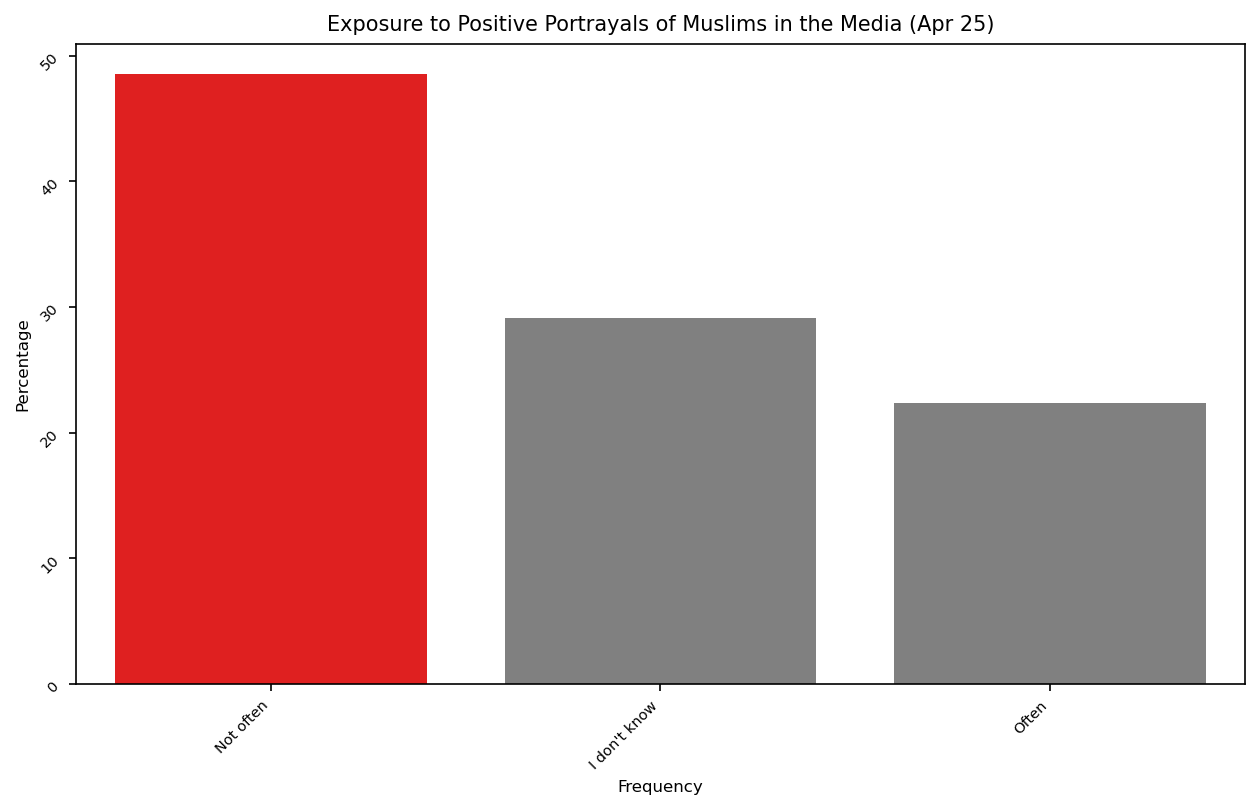

In [178]:
plot_percentages(apr25, 'How often do you hear positive things about Muslims in the media?', 'Frequency',\
                  'Exposure to Positive Portrayals of Muslims in the Media (Apr 25)' )

Between January and April 2025, the number of people who reported seeing positive media stories about Muslims more than doubled—from under 10% to over 20%. 
Meanwhile, the share of respondents who said they were unsure about their exposure remained largely unchanged

In [195]:
def plot_exposure(df, category_col, exposure_level, title, xlabel, ylabel): 
    
    grouped = df.groupby([category_col, exposure_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=exposure_level, values='percentage').fillna(0)

    exposure_colors = {
        'Often': '#17b50e',            
        'Not Often': '#cf4229',     
        "I don't know": '#9db0f2' 
    }

    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), 
                          color=[exposure_colors.get(level, '#cccccc') for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Exposure Level', bbox_to_anchor=(1.05, 1), loc='upper left')

    for i, category in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[category, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  # Position in the middle of each segment
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Often' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    plt.figure(figsize=(9, 5), dpi=400)
    plt.show()

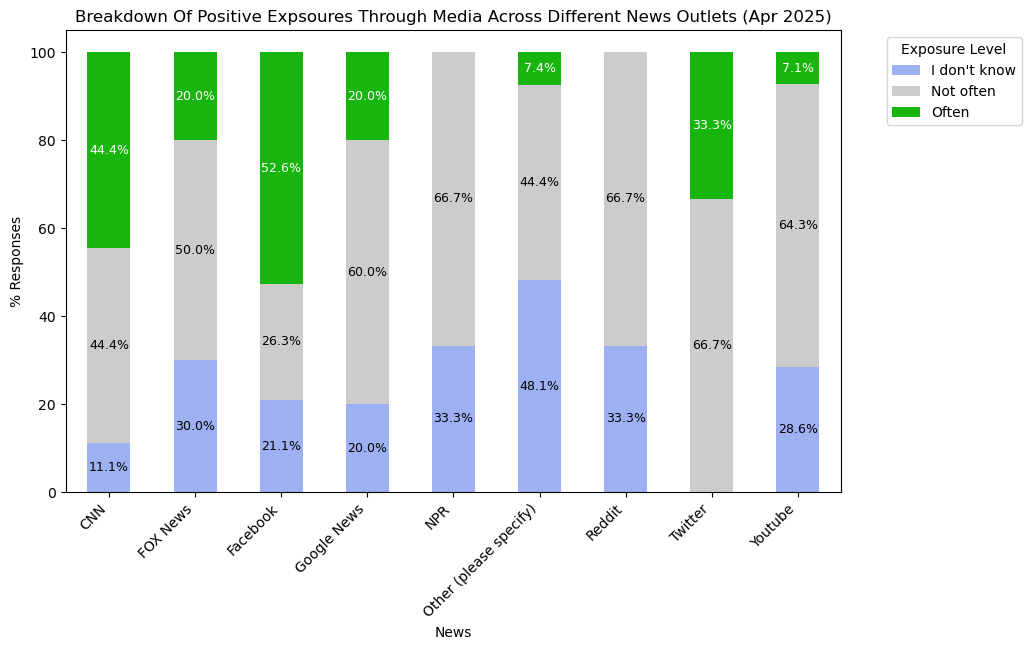

<Figure size 3600x2000 with 0 Axes>

In [198]:
plot_exposure(
    df= apr25, 
    category_col= 'Where do you get your news from?',
    exposure_level = 'How often do you hear positive things about Muslims in the media?',
    title='Breakdown Of Positive Expsoures Through Media Across Different News Outlets (Apr 2025)',
    xlabel='News',
    ylabel='% Responses',
)

Fox News users don’t report the lowest exposure to positive portrayals; 20% say they’ve seen positive stories about Muslims, yet they report the highest levels of discomfort. 
In contrast, NPR users report the lowest exposure to positive portrayals but express the highest levels of comfort around Muslims. 

Meanwhile, Facebook users report the most exposure to positive portrayals (52%), but their comfort levels don’t stand out compared to other groups

# Breakdown of Comfort Levels Across Education¶

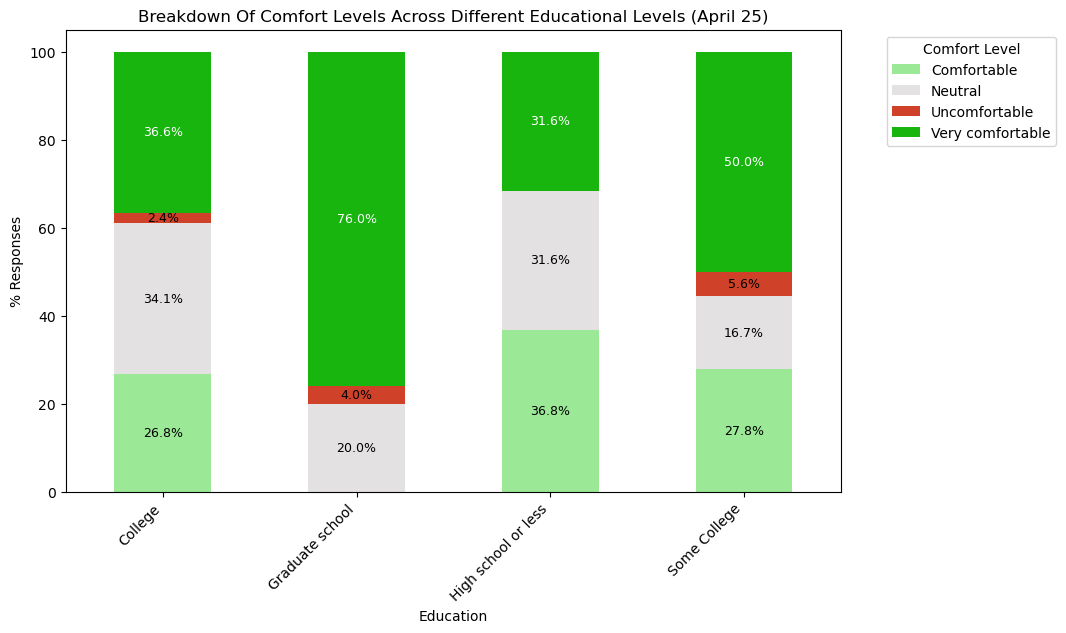

In [199]:
plot_comfort(
    df= apr25, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educational Levels (April 25)',
    xlabel='Education',
    ylabel='% Responses',
)

In April 2025, discomfort toward Muslims reemerged (was absent in January 2025) across three educational groups—'Some College', 'College', and 'Graduate School' with'Some College' group reporting the highest level of discomfort (5.6%). 

Despite this, respondents with graduate-level education reported the highest proportion of being 'Very comfortable' (76%), suggesting a strong overall sense of ease despite some malaise. Conversely, individuals with a high school education or less reported the lowest percentage of 'Very comfortable' responses and the second-highest level of neutrality, indicating greater ambivalence or uncertainty in their view

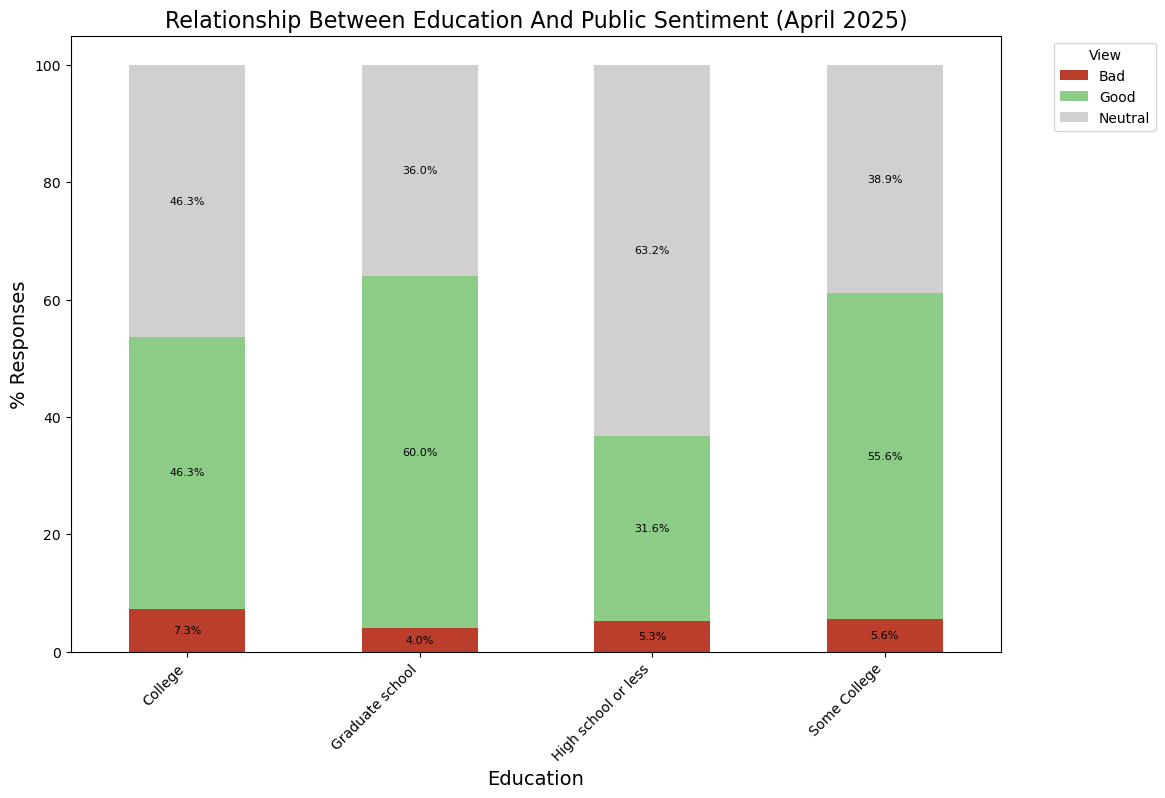

<Figure size 7200x4000 with 0 Axes>

In [200]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Relationship Between Education And Public Sentiment (April 2025)',
    xlabel='Education',
    ylabel='% Responses',
    cat_col= 'What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

Respondents at opposite ends of the educational spectrum, those with graduate-level education and those with a high school education or less, exhibited contrasting sentiment patterns. 
While graduate-educated individuals reported the highest proportion of positive views and the lowest negative sentiment, those with the least education demonstrated the greatest levels of neutrality and the lowest share of positive sentiment. 

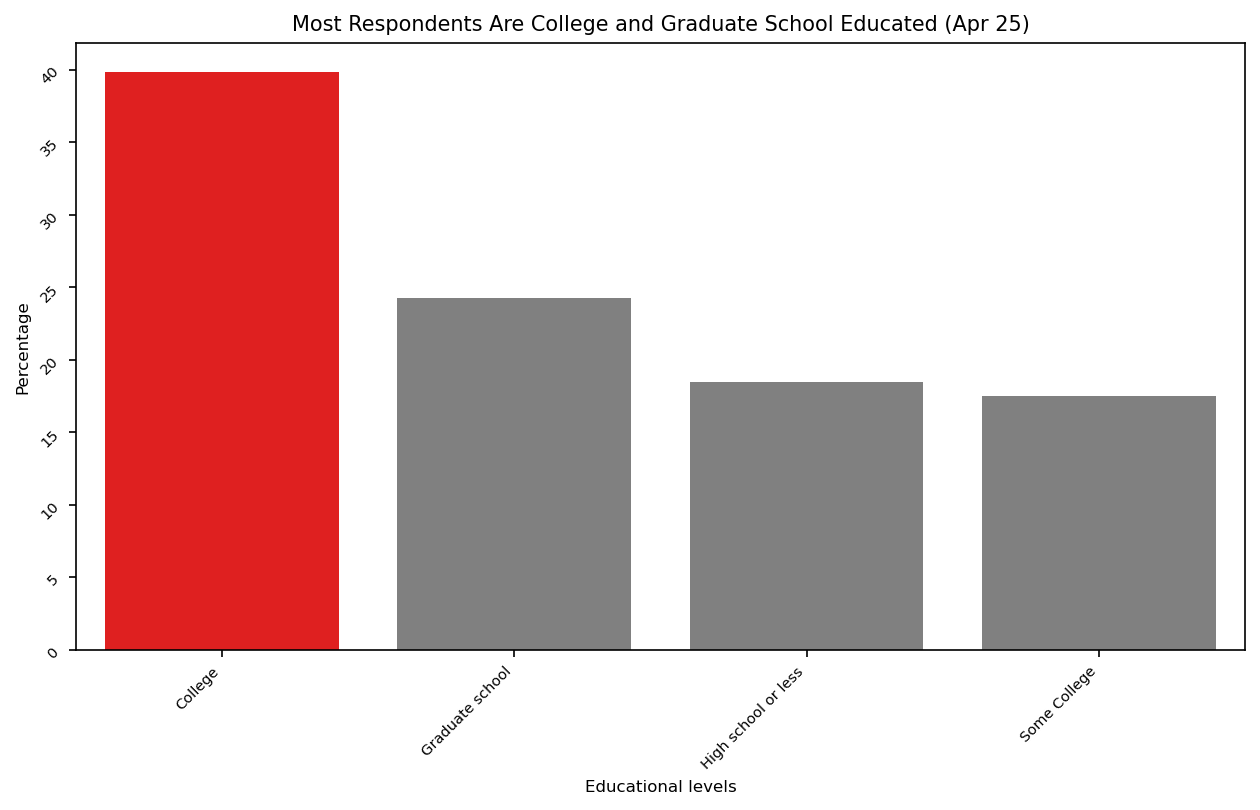

In [204]:
plot_percentages(apr25,'What is your level of education?', 'Educational levels',\
           'Most Respondents Are College and Graduate School Educated (Apr 25)')

# Distribution Of Sentiment Across Different Ages

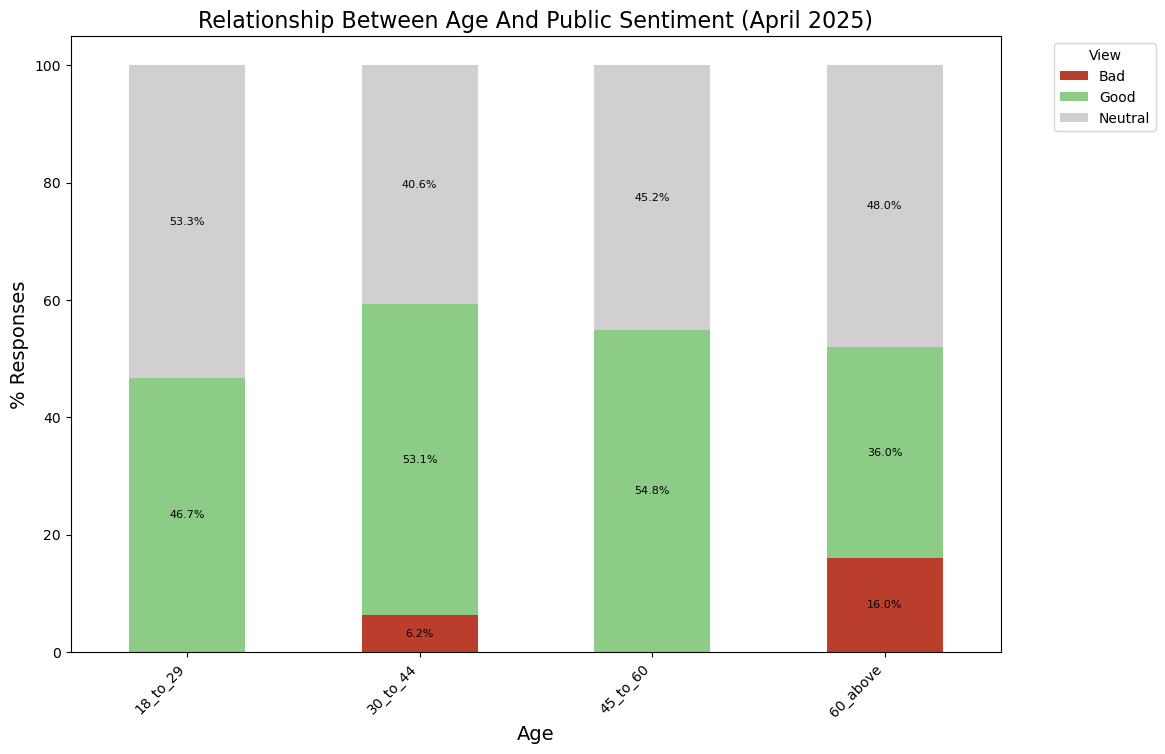

<Figure size 7200x4000 with 0 Axes>

In [205]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Relationship Between Age And Public Sentiment (April 2025)',
    xlabel='Age',
    ylabel='% Responses',
    cat_col= 'Age',
    sent_col='How do you feel about Muslim people in America?'
)

In January 2025, respondents in the older age group of 60 and above were almost evenly split between positive perception and neutral perception, however, the trend shifted in April with more respondents expressing negative views.
The younger age group reverted back to being divided between good and neural with no negative views recorded

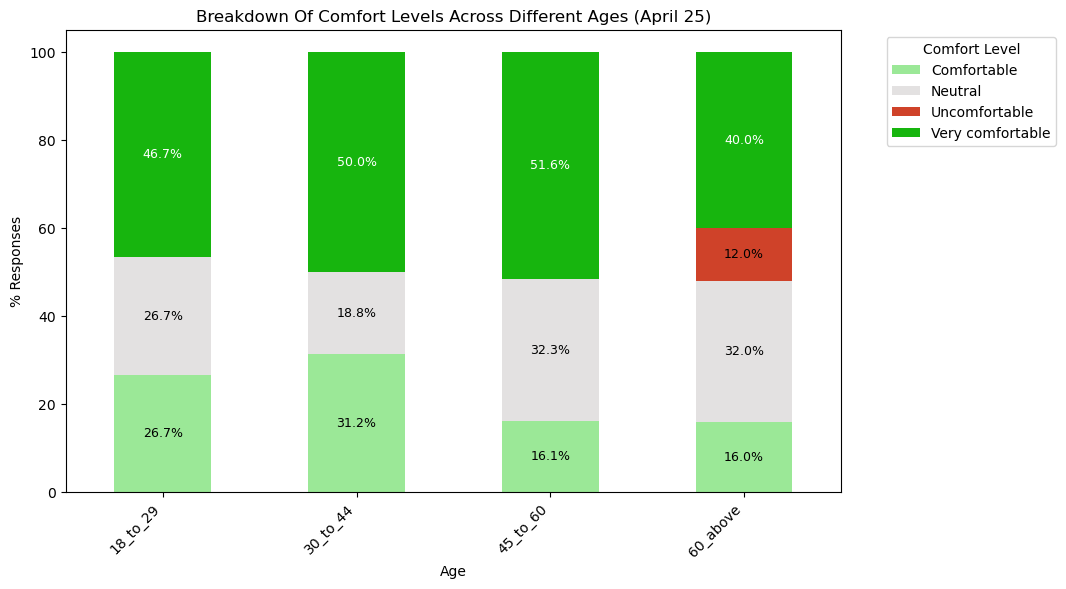

In [206]:
plot_comfort(
    df= apr25, 
    category_col= 'Age',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Ages (April 25)',
    xlabel='Age',
    ylabel='% Responses',
)

In April 2025, respondents aged 30–44 reported the highest overall comfort levels with Muslims, with over 80% expressing that they felt either comfortable or very comfortable. In contrast, the 60+ age group showed the lowest levels of comfort and the highest reported discomfort (12%), marking a notable decline from January 2025 when none in this age group reported discomfort and over 70% reported feeling comfortable

# Distribution of Sentiment Across Different Income Groups

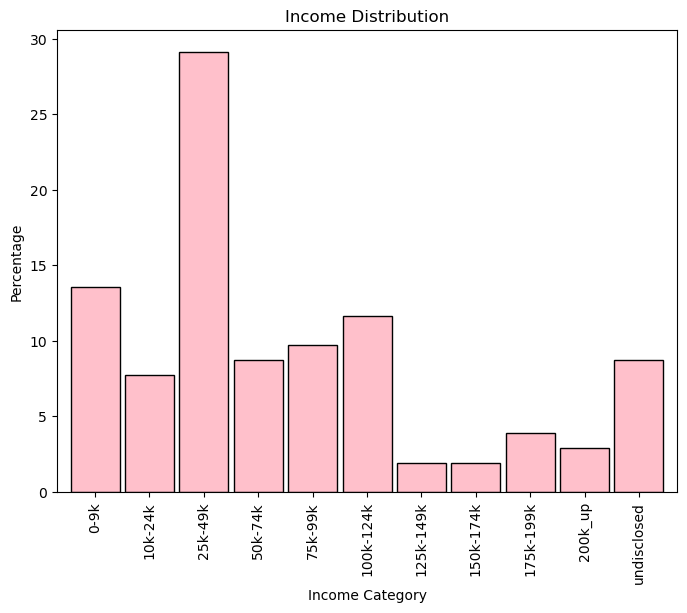

In [207]:
income_percentages = apr25['Household Income'].value_counts(normalize=True).sort_index() * 100

income_percentages.plot(kind='bar', figsize=(8, 6), color='pink', width= 0.9, edgecolor='black')
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Distribution')
plt.show()

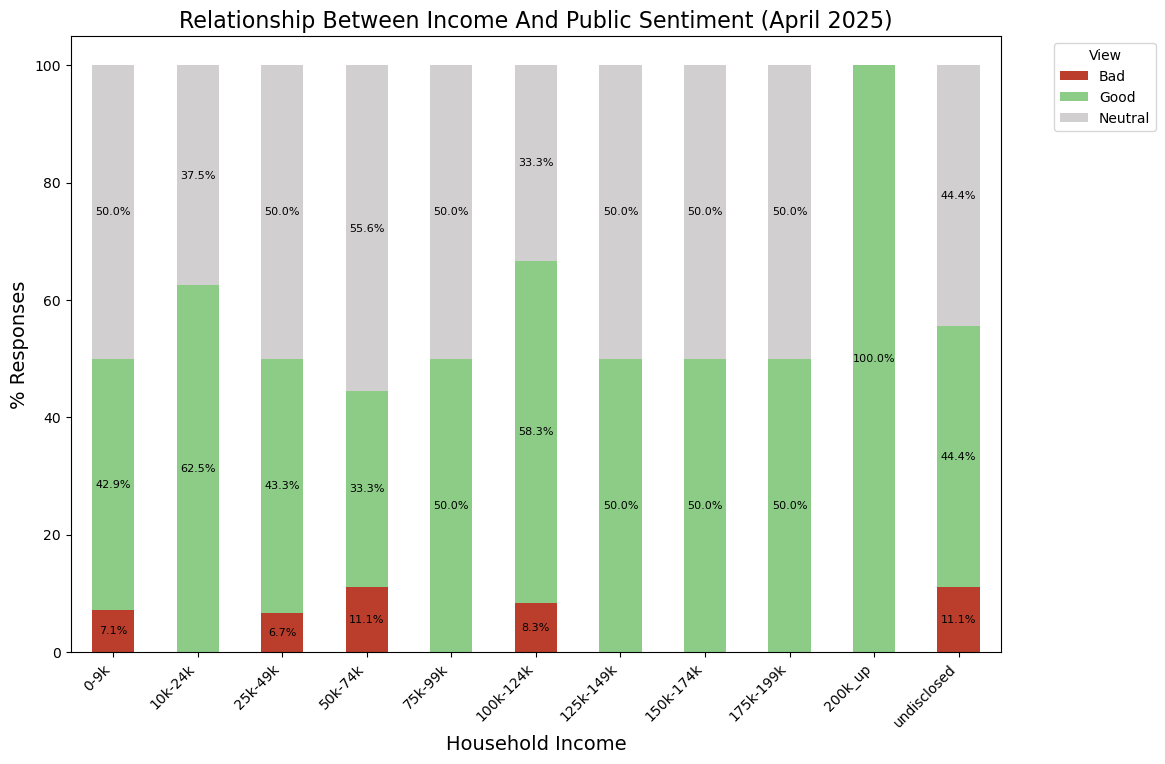

<Figure size 7200x4000 with 0 Axes>

In [208]:
plot_stacked_bar_chart(
    df=apr25, 
    title='Relationship Between Income And Public Sentiment (April 2025)',
    xlabel='Household Income',
    ylabel='% Responses',
    cat_col= 'Household Income',
    sent_col='How do you feel about Muslim people in America?'
)

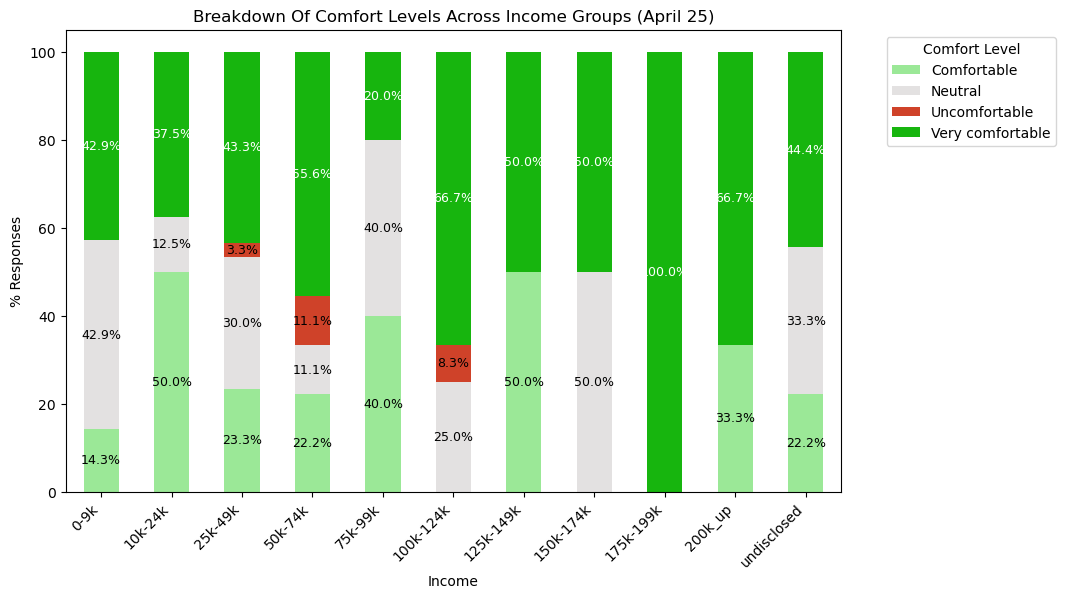

In [209]:
plot_comfort(
    df= apr25, 
    category_col= 'Household Income',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Income Groups (April 25)',
    xlabel='Income',
    ylabel='% Responses',
)

As of April 2025, a greater number of income brackets, particularly those in the low to mid range, reported holding negative views of Muslims in America compared to January. 

In contrast, individuals in higher income groups tended to express either positive or neutral sentiment, with few reporting explicitly negative views. This trend also holds with comfort levels.

In [211]:
apr25.columns

Index(['What is your religion?', 'Religion_other',
       'How many muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Would you feel comfortable buying goods or services from a Muslim-owned business?',
       'If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?',
       'How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?',
       'Gender', 'Age', 'Major US Region', 'Household Income'],
      dtype='object')

# Effect Of Exposure Through Events On Overall Sentiment

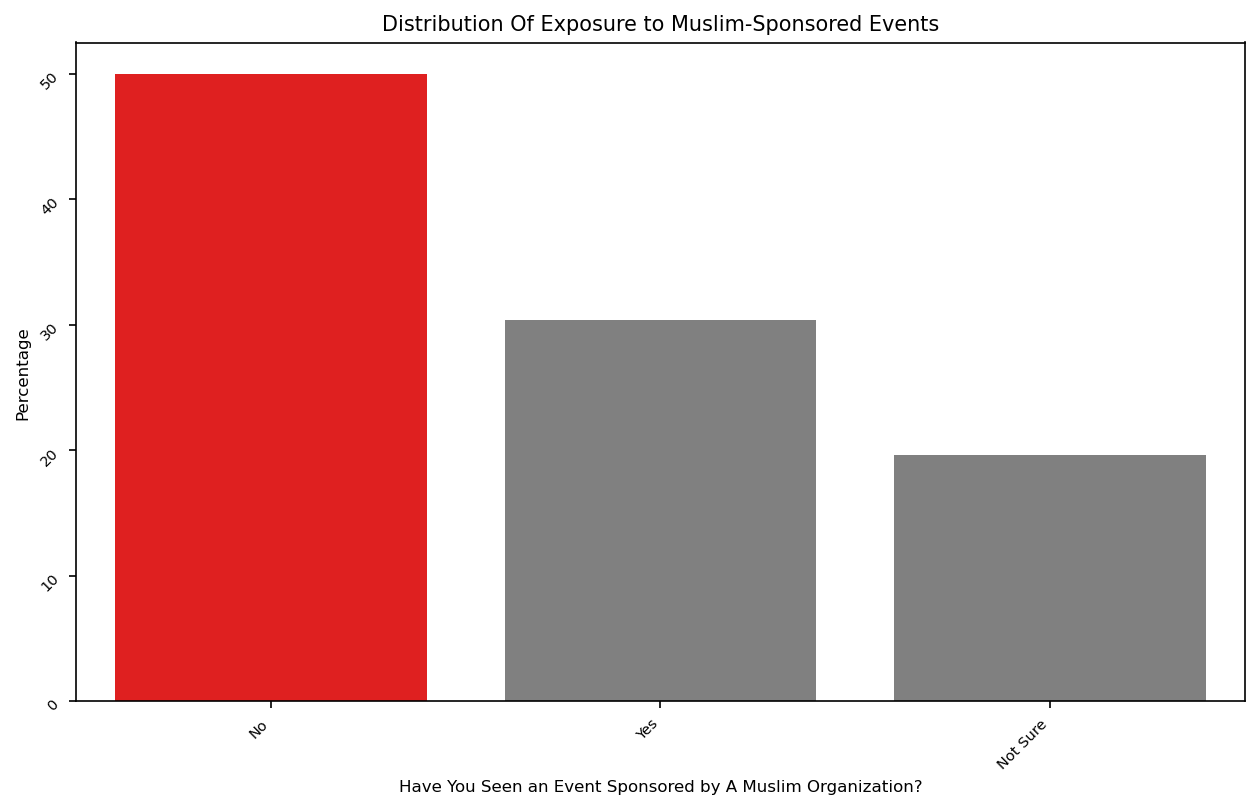

In [218]:
column_name= 'In the last 30 days, have you come across any events or activities \
sponsored by a Muslim person or organization?'
df= apr25
x_label= "Have You Seen an Event Sponsored by A Muslim Organization?"
title= "Distribution Of Exposure to Muslim-Sponsored Events"
    
plot_percentages(df, column_name, x_label, title)

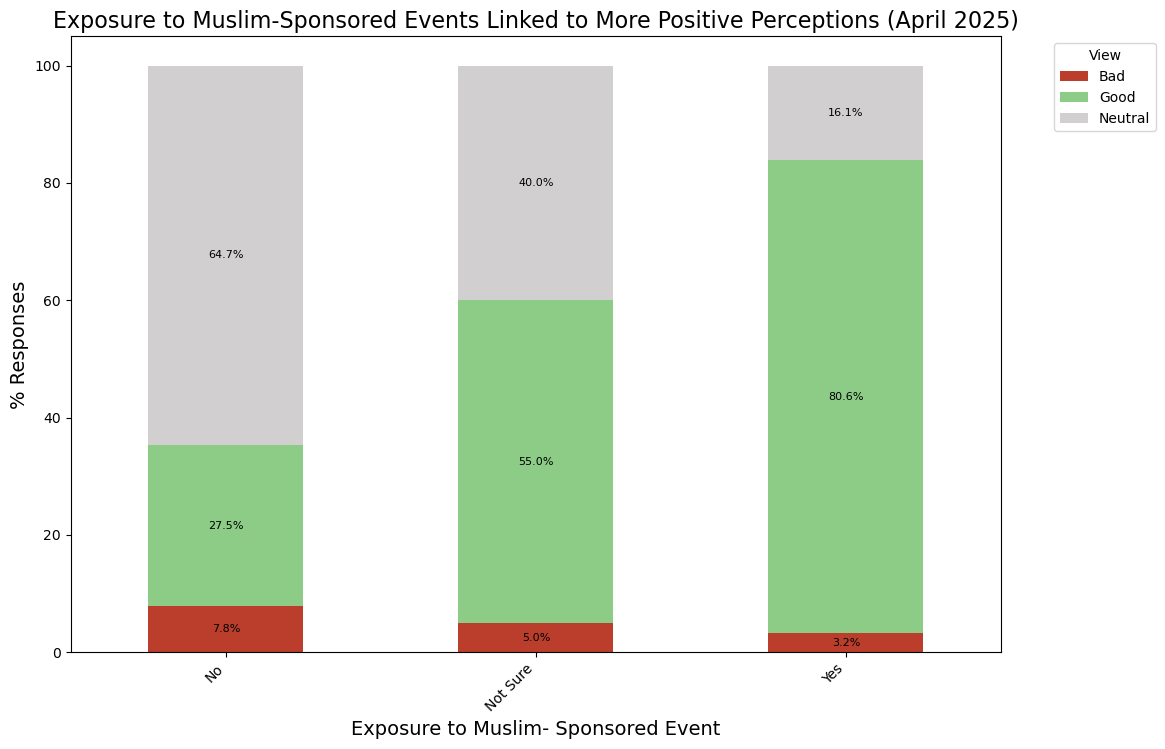

<Figure size 7200x4000 with 0 Axes>

In [226]:
plot_stacked_bar_chart(
    df=apr25, 
    title="Exposure to Muslim-Sponsored Events Linked to More Positive Perceptions (April 2025)",
    xlabel='Exposure to Muslim- Sponsored Event',
    ylabel='% Responses',
    cat_col= 'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
    sent_col='How do you feel about Muslim people in America?'
)

Compared to January, respondents who encountered Muslim-sponsored events in April 2025 remained the most likely to express positive views of Muslims (80.6%). However, unlike in January, this group also reported the lowest levels of negative sentiment (3.2%). In contrast, individuals who had not encountered such events were more likely to feel neutral or hold unfavorable views, suggesting that lack of exposure may be associated with more detached or negative attitudes

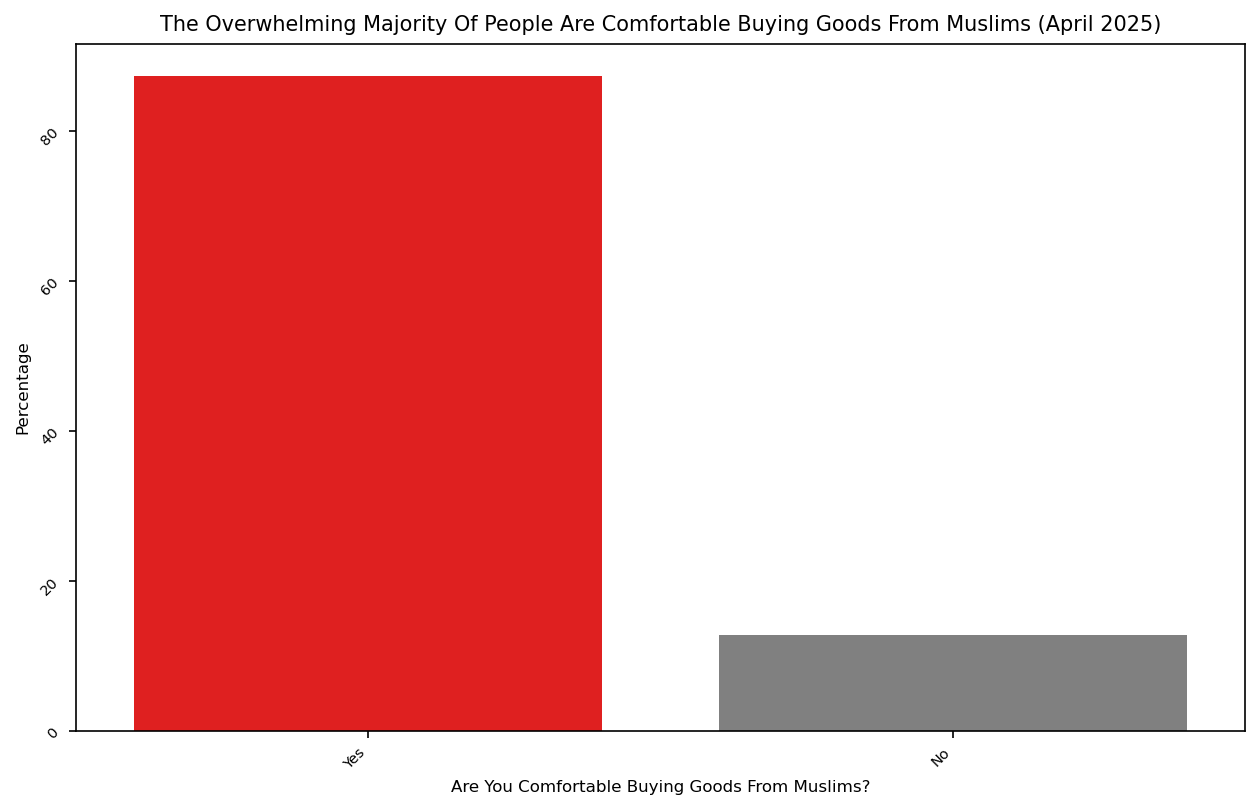

In [222]:
column_name='Would you feel comfortable buying goods or services from a Muslim-owned business?'
df= apr25
x_label= "Are You Comfortable Buying Goods From Muslims?"
title= "The Overwhelming Majority Of People Are Comfortable Buying Goods From Muslims (April 2025)"
    
plot_percentages(df, column_name, x_label, title)

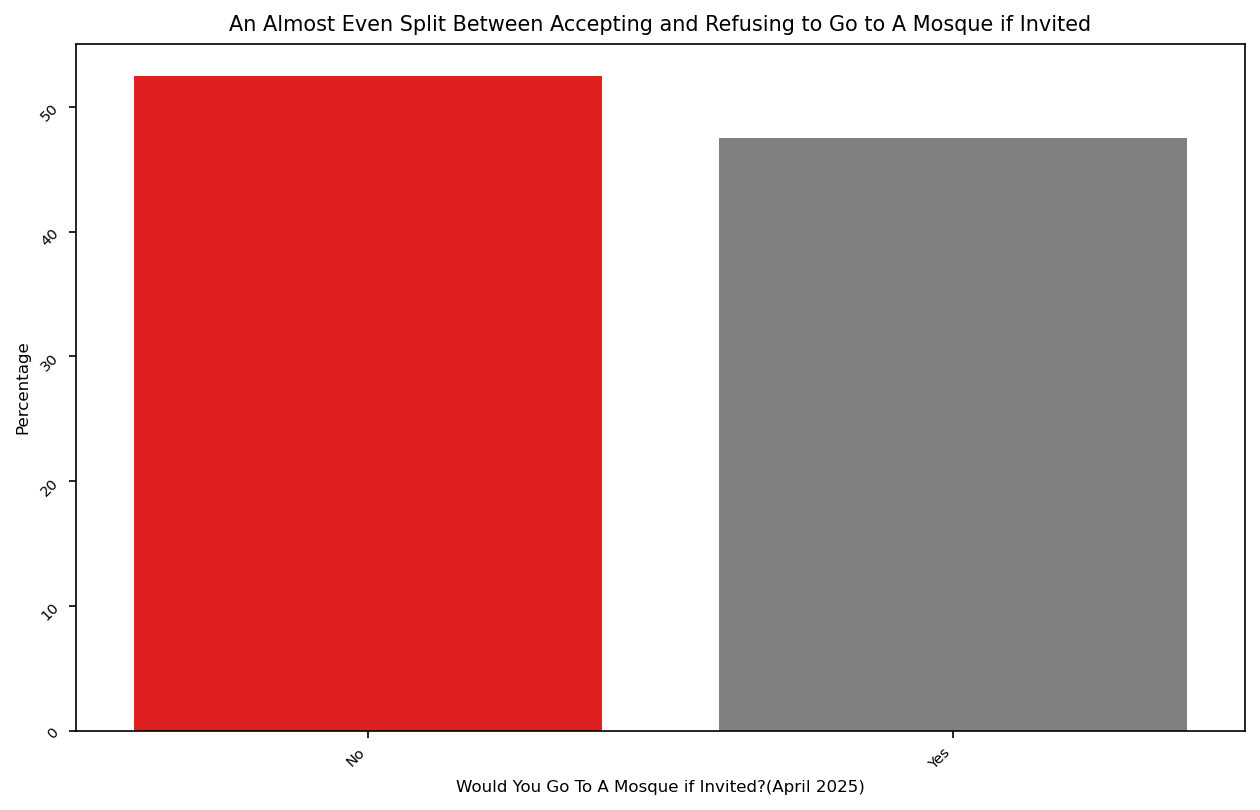

In [225]:
column_name= "If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?"
df= apr25
x_label= "Would You Go To A Mosque if Invited?(April 2025)"
title= "An Almost Even Split Between Accepting and Refusing to Go to A Mosque if Invited"
    
plot_percentages(df, column_name, x_label, title)
